In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
base_path = '../data/raw/Fluo-N2DL-HeLa/01'
gt_seg_path = '../data/raw/Fluo-N2DL-HeLa/01_GT/SEG'

# Get list of annotated frames
annotated_files = sorted([f for f in os.listdir(gt_seg_path) if f.endswith('.tif')])

# Load image + mask pairs
images = []
masks = []
frame_ids = []

for f in annotated_files:
    idx = f.replace('man_seg', '').replace('.tif', '').zfill(3)
    image_path = os.path.join(base_path, f't{idx}.tif')
    mask_path = os.path.join(gt_seg_path, f)
    
    if os.path.exists(image_path):
        img = np.array(Image.open(image_path))
        msk = np.array(Image.open(mask_path))
        
        images.append(img)
        masks.append(msk)
        frame_ids.append(idx)


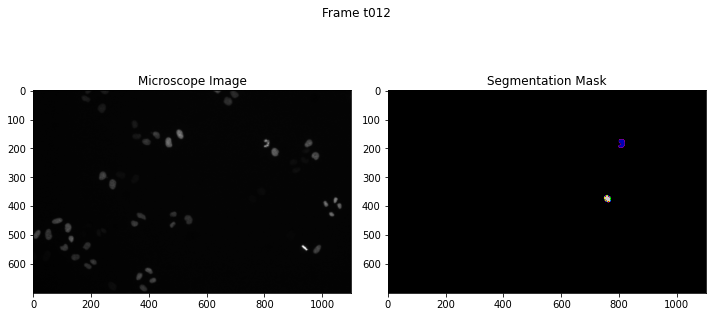

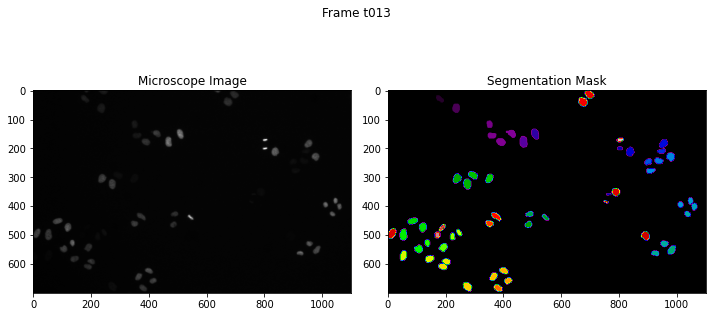

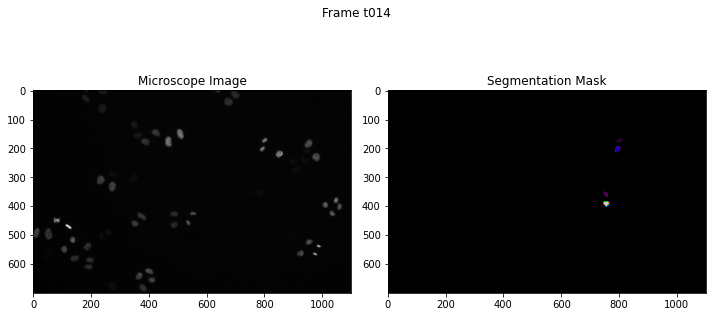

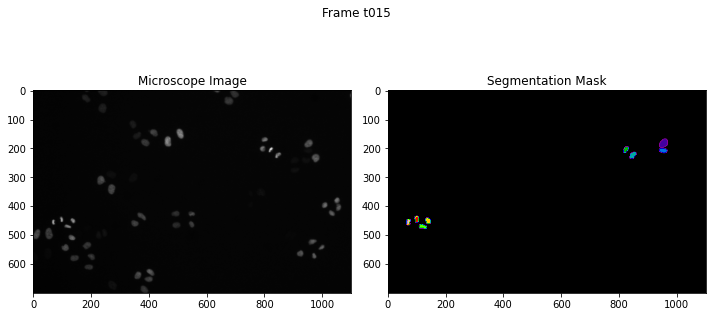

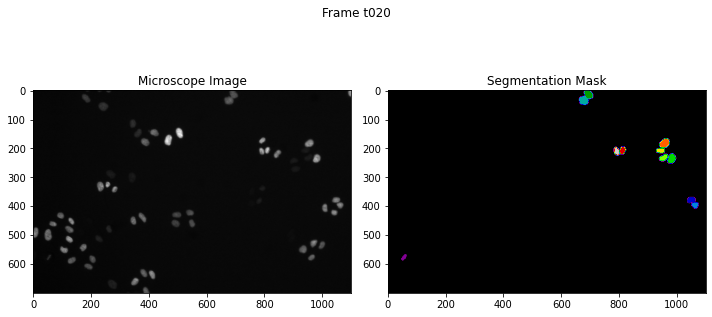

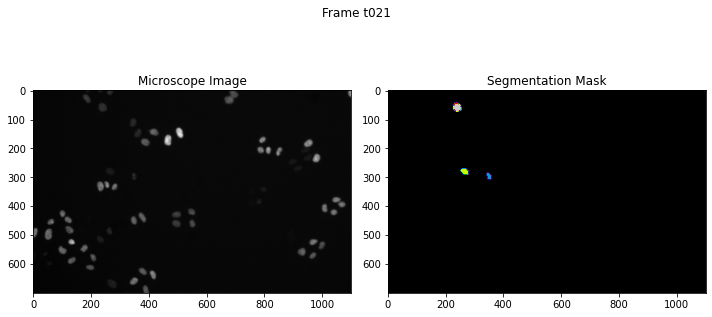

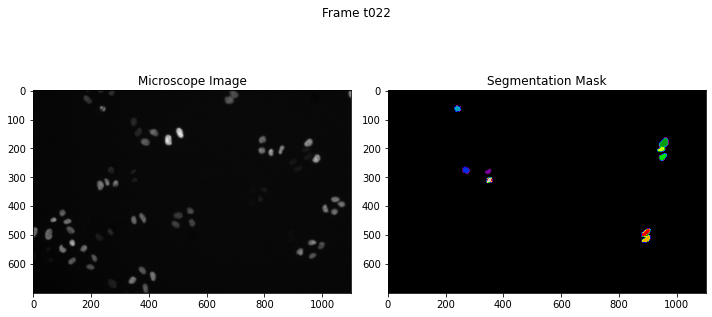

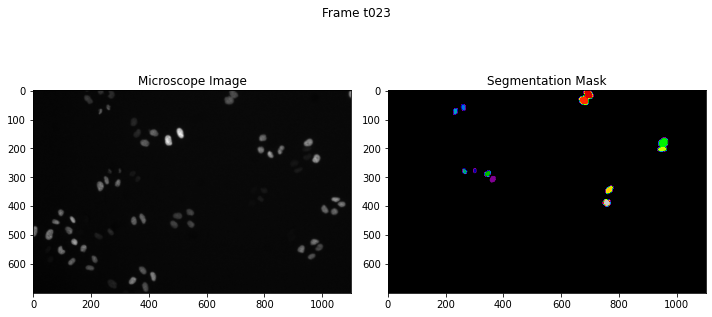

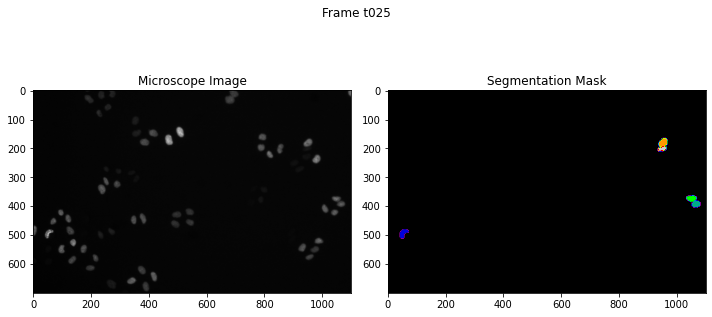

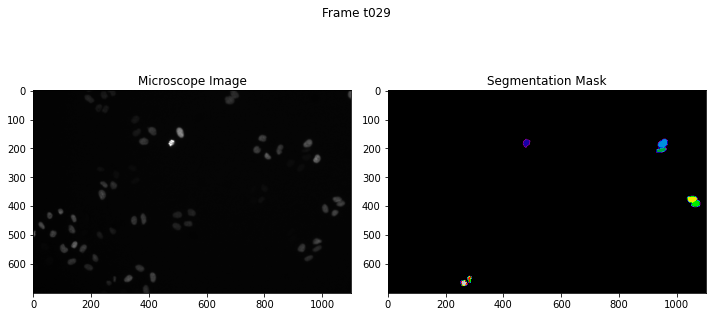

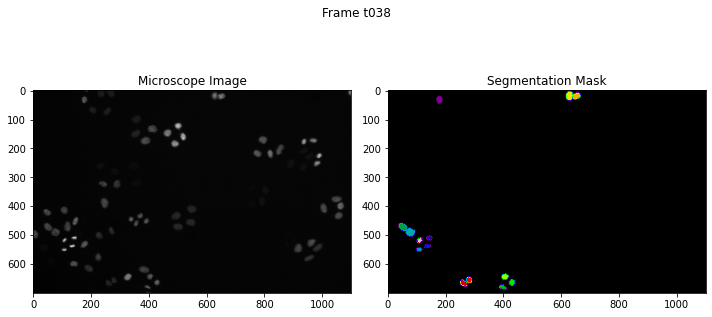

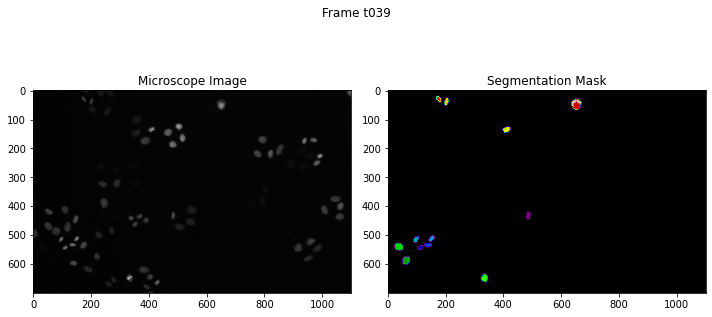

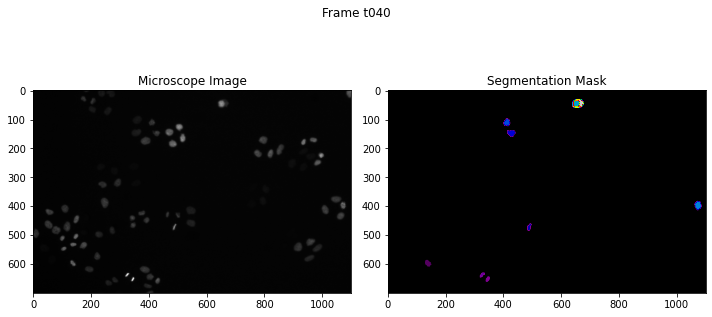

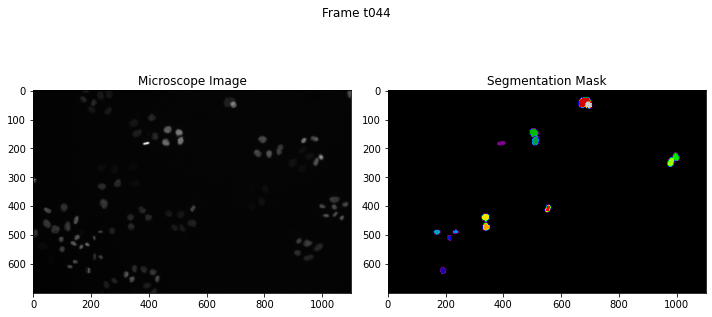

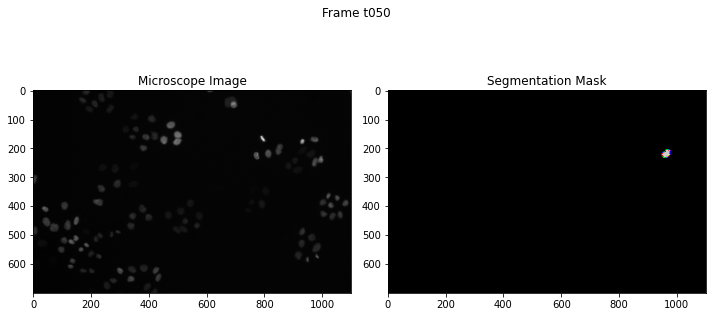

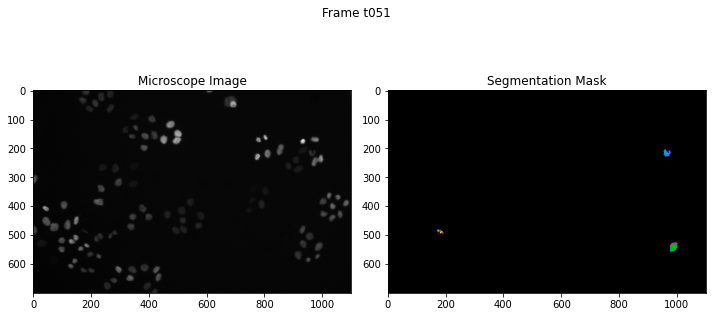

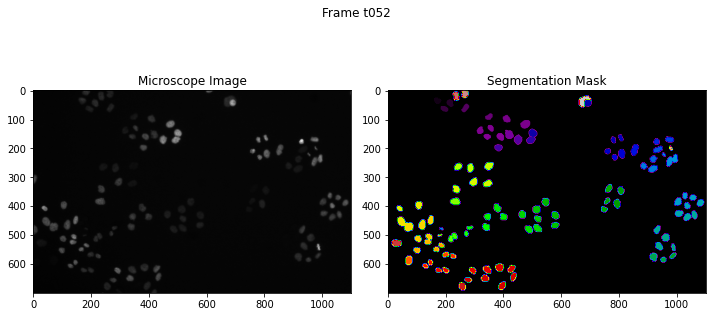

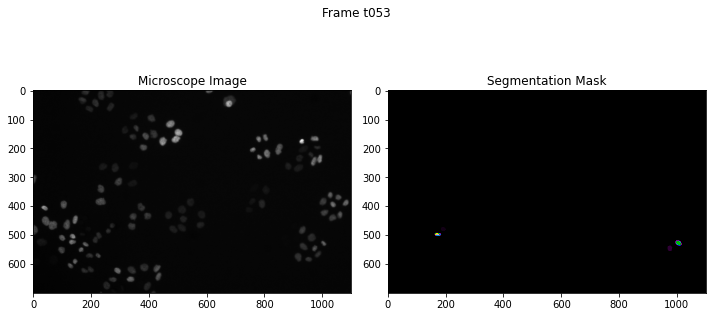

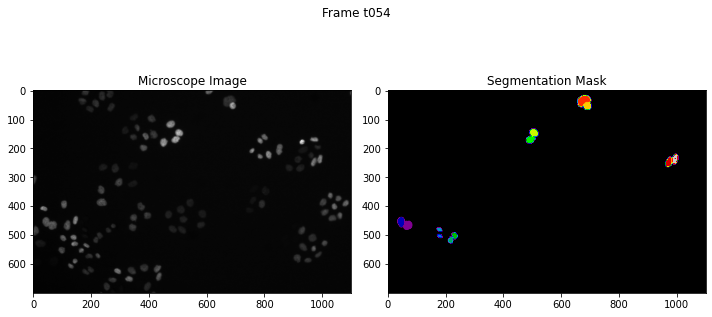

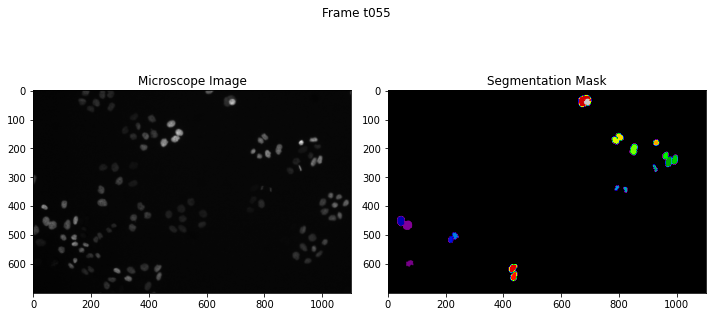

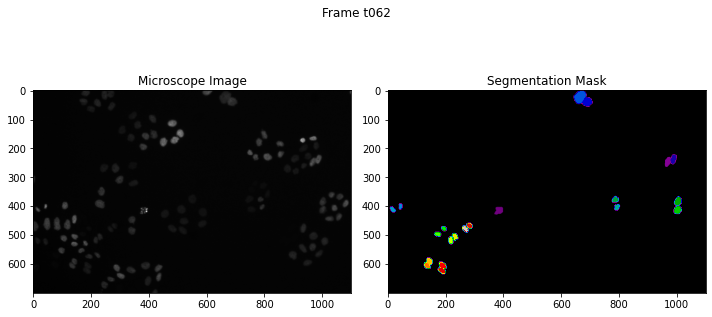

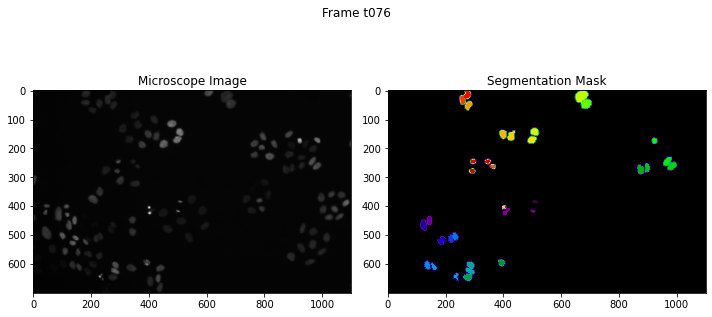

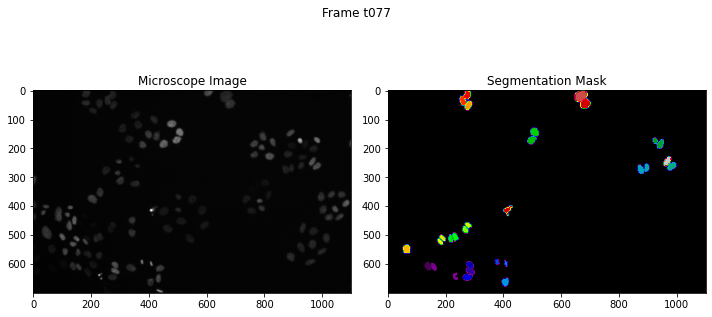

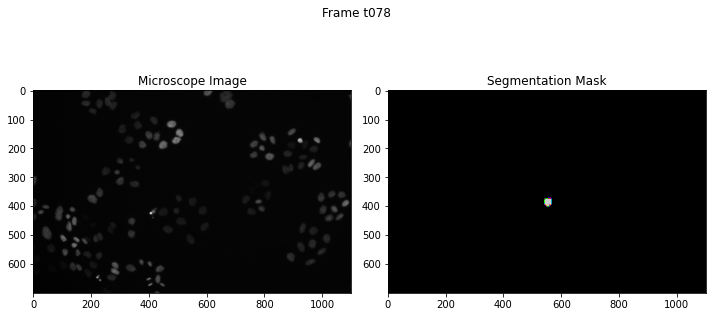

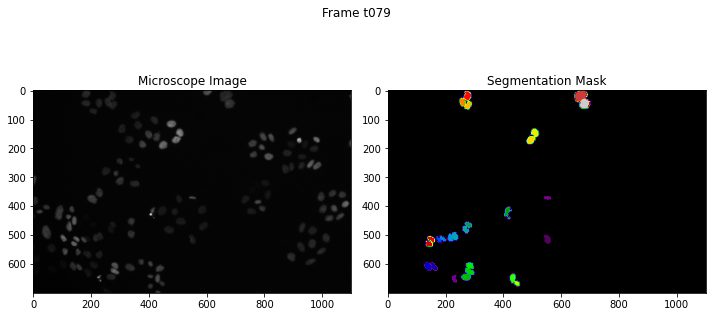

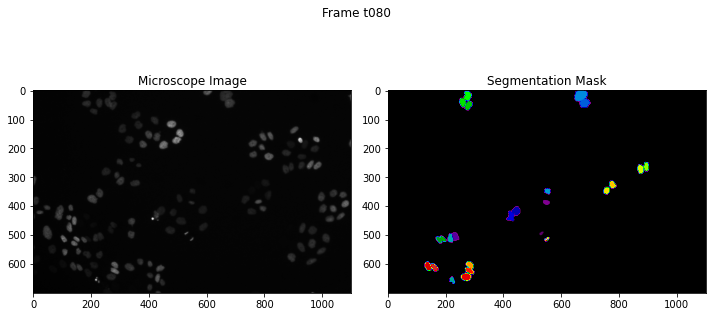

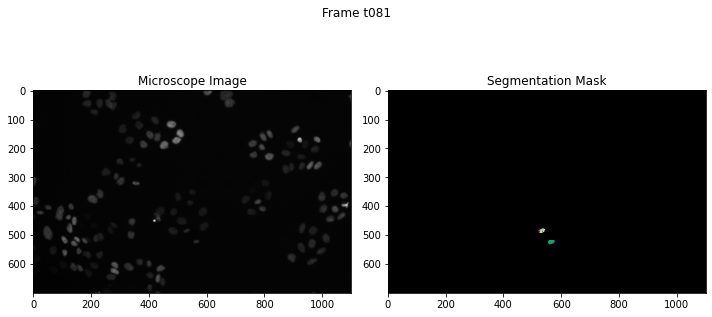

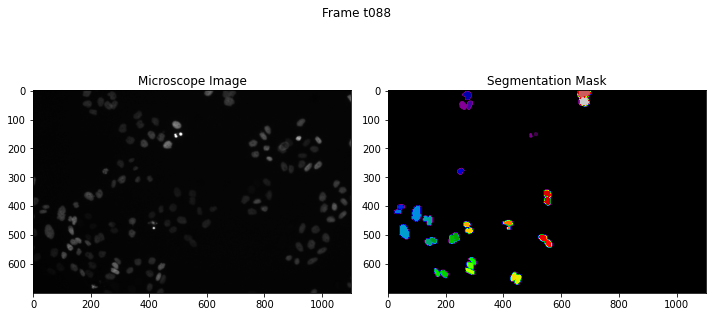

IndexError: list index out of range

In [2]:
def show_sample(img, mask, title=""):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Microscope Image")
    axes[1].imshow(mask, cmap='nipy_spectral')
    axes[1].set_title("Segmentation Mask")
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Show a few samples
for i in range(88):
    show_sample(images[i], masks[i], f"Frame t{frame_ids[i]}")


In [3]:
import os
from glob import glob

# Paths to labeled segmentation folders
seg_paths = [
    "Fluo-N2DL-HeLa/01_GT/SEG",
    "Fluo-N2DL-HeLa/02_GT/SEG"
]

# Count all GT masks
gt_mask_files = []
for path in seg_paths:
    gt_mask_files.extend(glob(os.path.join(path, "man_seg*.tif")))

print(f"✅ Total labeled frames: {len(gt_mask_files)}")


✅ Total labeled frames: 36


In [4]:
len(os.listdir("Fluo-N2DL-HeLa/02_GT/SEG")) , len(os.listdir("Fluo-N2DL-HeLa/01_GT/SEG"))

(8, 28)

# Normalize and resize

In [10]:
import numpy as np
import cv2
from PIL import Image

# Example size (adjust as needed)
IMG_SIZE = 256

def load_and_preprocess(image_path, mask_path, img_size=IMG_SIZE):
    # Load image
    img = Image.open(image_path).convert('L')
    mask = Image.open(mask_path)

    # Normalize [0,255] → [0,1]
    img = np.array(img) / 255.0
    mask = np.array(mask)

    # Resize both
    img_resized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
    mask_resized = cv2.resize(mask, (img_size, img_size), interpolation=cv2.INTER_NEAREST)

    return img_resized, mask_resized


In [5]:
from sklearn.model_selection import train_test_split

# Build image-mask pairs
image_dir_01 = "Fluo-N2DL-HeLa/01"
mask_dir_01 = "Fluo-N2DL-HeLa/01_GT/SEG"

image_mask_pairs = []
for mask_file in os.listdir(mask_dir_01):
    if mask_file.startswith("man_seg") and mask_file.endswith(".tif"):
        time_index = mask_file.replace("man_seg", "").replace(".tif", "")
        img_file = f"t{time_index}.tif"
        img_path = os.path.join(image_dir_01, img_file)
        mask_path = os.path.join(mask_dir_01, mask_file)

        if os.path.exists(img_path):
            image_mask_pairs.append((img_path, mask_path))

# Repeat for 02
image_dir_02 = "Fluo-N2DL-HeLa/02"
mask_dir_02 = "Fluo-N2DL-HeLa/02_GT/SEG"
for mask_file in os.listdir(mask_dir_02):
    if mask_file.startswith("man_seg") and mask_file.endswith(".tif"):
        time_index = mask_file.replace("man_seg", "").replace(".tif", "")
        img_file = f"t{time_index}.tif"
        img_path = os.path.join(image_dir_02, img_file)
        mask_path = os.path.join(mask_dir_02, mask_file)

        if os.path.exists(img_path):
            image_mask_pairs.append((img_path, mask_path))

# Split
train_pairs, val_pairs = train_test_split(image_mask_pairs, test_size=0.2, random_state=42)

print(f"✅ Training pairs: {len(train_pairs)}")
print(f"✅ Validation pairs: {len(val_pairs)}")


✅ Training pairs: 28
✅ Validation pairs: 8


In [6]:
train_pairs

[('Fluo-N2DL-HeLa/01\\t025.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg025.tif'),
 ('Fluo-N2DL-HeLa/01\\t053.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg053.tif'),
 ('Fluo-N2DL-HeLa/01\\t029.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg029.tif'),
 ('Fluo-N2DL-HeLa/02\\t079.tif', 'Fluo-N2DL-HeLa/02_GT/SEG\\man_seg079.tif'),
 ('Fluo-N2DL-HeLa/01\\t012.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg012.tif'),
 ('Fluo-N2DL-HeLa/01\\t020.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg020.tif'),
 ('Fluo-N2DL-HeLa/02\\t035.tif', 'Fluo-N2DL-HeLa/02_GT/SEG\\man_seg035.tif'),
 ('Fluo-N2DL-HeLa/01\\t051.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg051.tif'),
 ('Fluo-N2DL-HeLa/01\\t055.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg055.tif'),
 ('Fluo-N2DL-HeLa/01\\t021.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg021.tif'),
 ('Fluo-N2DL-HeLa/01\\t039.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg039.tif'),
 ('Fluo-N2DL-HeLa/01\\t013.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_seg013.tif'),
 ('Fluo-N2DL-HeLa/01\\t079.tif', 'Fluo-N2DL-HeLa/01_GT/SEG\\man_

## Save Data in a structured folder

In [186]:
# import shutil
# from tqdm import tqdm 
# data_folder = "Fluo-Structured"
# os.makedirs(data_folder, exist_ok=True)

# dict_subsets = {
#     "train": train_pairs,
#     "val": val_pairs
# }

# # def save_image(src_path,destination):
    
# #     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
# # #     with Image.open(src_path) as img:
        
# #     if "man_seg" in src_path:
# #         base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
# #         rec = src_path.split("\\")[0].split("/")[1].split("_")[0]
# #         dst_path = os.path.join(destination, f"{rec}_t" + base_name + ".png")

# # #             print(os.path.splitext(os.path.basename(src_path))[0].split("man_seg"))
# #     else:
# #         base_name = os.path.splitext(os.path.basename(src_path))[0]
# #         rec = src_path.split("\\")[0].split("/")[1]

# #         dst_path = os.path.join(destination, f"{rec}_" + base_name + ".png")

# # #         img.save(dst_path, format="PNG")
# #     cv2.imwrite(dst_path, img.astype(np.uint8))

# # def save_image(src_path, destination):
# #     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)

# #     if img is None:
# #         print(f"Failed to read image: {src_path}")
# #         return

# #     if "man_seg" in src_path:
# #         base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
# # #         rec = os.path.basename(os.path.dirname(src_path)).split("_")[0]
# #         rec = src_path.split("\\")[0].split("/")[1].split("_")[0]

# #         dst_path = os.path.join(destination, f"{rec}_t{base_name}.png")
# #     else:
# #         base_name = os.path.splitext(os.path.basename(src_path))[0]
# #         rec = os.path.basename(os.path.dirname(src_path))

# #         dst_path = os.path.join(destination, f"{rec}_{base_name}.png")

# #     cv2.imwrite(dst_path, img.astype(np.uint8))

    
# for images_folder in ["images","masks"]:
#     os.makedirs( os.path.join(data_folder,images_folder), exist_ok=True )
    
#     for subset in ["train", "val"]:
#         os.makedirs( os.path.join(data_folder, images_folder, subset), exist_ok=True)
        
#         for image, mask in tqdm(dict_subsets[subset],desc= f"{images_folder},{subset}" ):
           
#             rec_mask = mask.split("/")[1].split("_")[0] + "_"
#             rec_image = image.split("/")[1].split("\\")[0]+ "_"
            
            
#             image_base = rec_image + image.split("\\")[-1]
#             mask_base = rec_mask+  mask.split("\\")[-1].replace("man_seg","t")

# #             print(mask_base)
# #             print(image)
#             destination = os.path.join(data_folder, images_folder, subset)
            
            
            
#             #copy
#             if images_folder == "images":
# #                 save_image(image,destination)
#                 shutil.copy2(image,  os.path.join(destination, image_base))
#             else:
# #                 save_image(mask,destination)
#                 shutil.copy2(mask,  os.path.join(destination, mask_base))            
            
            
# #             print(image.split("\\"))
# #             print(mask.split("\\"))
            
# #dna-> rna -> protein

In [191]:
# import shutil
# from tqdm import tqdm 
# data_folder = "Fluo-Structured"
# os.makedirs(data_folder, exist_ok=True)

# dict_subsets = {
#     "train": train_pairs,
#     "val": val_pairs
# }

# def save_image(src_path,destination):
    
#     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
# #     with Image.open(src_path) as img:
        
#     if "man_seg" in src_path:
#         base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
#         rec = src_path.split("\\")[0].split("/")[1].split("_")[0]
#         dst_path = os.path.join(destination, f"{rec}_t" + base_name + ".png")

# #             print(os.path.splitext(os.path.basename(src_path))[0].split("man_seg"))
#     else:
#         base_name = os.path.splitext(os.path.basename(src_path))[0]
#         rec = src_path.split("\\")[0].split("/")[1]

#         dst_path = os.path.join(destination, f"{rec}_" + base_name + ".png")

# #         img.save(dst_path, format="PNG")
#     cv2.imwrite(dst_path, img.astype(np.uint8))



    
# for images_folder in ["images","masks"]:
#     os.makedirs( os.path.join(data_folder,images_folder), exist_ok=True )
    
#     for subset in ["train", "val"]:
#         os.makedirs( os.path.join(data_folder, images_folder, subset), exist_ok=True)
        
#         for image, mask in tqdm(dict_subsets[subset],desc= f"{images_folder},{subset}" ):
           
#             rec_mask = mask.split("/")[1].split("_")[0] + "_"
#             rec_image = image.split("/")[1].split("\\")[0]+ "_"
            
            
# #             image_base = rec_image + image.split("\\")[-1]
# #             mask_base = rec_mask+  mask.split("\\")[-1].replace("man_seg","t")

            
#             image_base = image.split("\\")[-1]
#             mask_base = mask.split("\\")[-1]
            
# #             print(mask_base)
# #             print(image)
#             destination = os.path.join(data_folder, images_folder, subset)
            
            
            
#             #copy
#             if images_folder == "images":
#                 save_image(image,destination)
# #                 shutil.copy2(image,  os.path.join(destination, image_base))
#             else:
#                 save_image(mask,destination)
# #                 shutil.copy2(mask,  os.path.join(destination, mask_base))            
            
            
# #             print(image.split("\\"))
# #             print(mask.split("\\"))
            
# #dna-> rna -> protein

In [196]:
# from PIL import Image
# import numpy as np
# import os
# import cv2
# from tqdm import tqdm

# data_folder = "Fluo-Structured"
# os.makedirs(data_folder, exist_ok=True)

# dict_subsets = {
#     "train": train_pairs,
#     "val": val_pairs
# }

# def save_image(src_path, destination):
#     # Use PIL for masks to preserve pixel values exactly
#     if "man_seg" in src_path:
#         # This is a mask
#         with Image.open(src_path) as img:
#             mask_arr = np.array(img)
#             # Save as PNG with exact pixel values
#             base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
#             rec = src_path.split("\\")[0].split("/")[1].split("_")[0]
#             dst_path = os.path.join(destination, f"{rec}_t" + base_name + ".png")
#             Image.fromarray(mask_arr).save(dst_path, format="PNG")
#     else:
#         # This is a normal image, read with OpenCV and save normally
#         img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
#         base_name = os.path.splitext(os.path.basename(src_path))[0]
#         rec = src_path.split("\\")[0].split("/")[1]
#         dst_path = os.path.join(destination, f"{rec}_" + base_name + ".png")
#         cv2.imwrite(dst_path, img.astype(np.uint8))


# for images_folder in ["images", "masks"]:
#     os.makedirs(os.path.join(data_folder, images_folder), exist_ok=True)
    
#     for subset in ["train", "val"]:
#         os.makedirs(os.path.join(data_folder, images_folder, subset), exist_ok=True)
        
#         for image, mask in tqdm(dict_subsets[subset], desc=f"{images_folder},{subset}"):
#             destination = os.path.join(data_folder, images_folder, subset)
            
#             if images_folder == "images":
#                 save_image(image, destination)
#             else:
#                 save_image(mask, destination)


In [193]:
len(train_pairs)

28

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
from tqdm import tqdm

data_folder = "../data/processed/Fluo-Structured"
os.makedirs(data_folder, exist_ok=True)

dict_subsets = {
    "train": train_pairs,
    "val": val_pairs
}

def save_image(src_path, destination):
    # Check if the file is a mask
    if "man_seg" in src_path:
        # Load mask with PIL to preserve pixel info
        with Image.open(src_path) as img:
            mask_arr = np.array(img)
            # Convert to binary mask (0 or 1)
            binary_mask = (mask_arr > 0).astype(np.uint8)
            # Scale mask pixels to 255 for visibility
            binary_mask = binary_mask * 255
            
            base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
            rec = src_path.split("\\")[0].split("/")[1].split("_")[0]
            dst_path = os.path.join(destination, f"{rec}_t" + base_name + ".png")
            
            # Save binary mask as PNG
            Image.fromarray(binary_mask).save(dst_path, format="PNG")
    else:
        # Load normal image with OpenCV in grayscale
        img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
        base_name = os.path.splitext(os.path.basename(src_path))[0]
        rec = src_path.split("\\")[0].split("/")[1]
        dst_path = os.path.join(destination, f"{rec}_" + base_name + ".png")
        cv2.imwrite(dst_path, img.astype(np.uint8))


for images_folder in ["images", "masks"]:
    os.makedirs(os.path.join(data_folder, images_folder), exist_ok=True)
    
    for subset in ["train", "val"]:
        os.makedirs(os.path.join(data_folder, images_folder, subset), exist_ok=True)
        
        for image, mask in tqdm(dict_subsets[subset], desc=f"{images_folder},{subset}"):
            destination = os.path.join(data_folder, images_folder, subset)
            
            if images_folder == "images":
                save_image(image, destination)
            else:
                save_image(mask, destination)


masks,val: 100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.79it/s]


# Visualization 

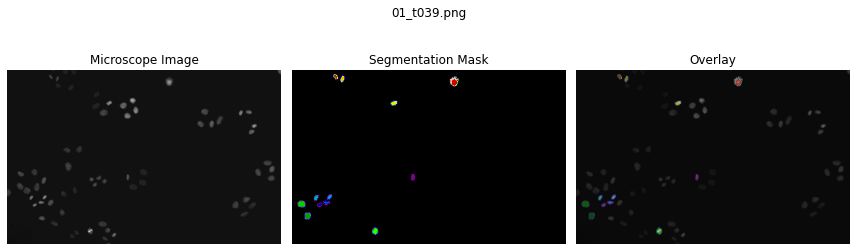

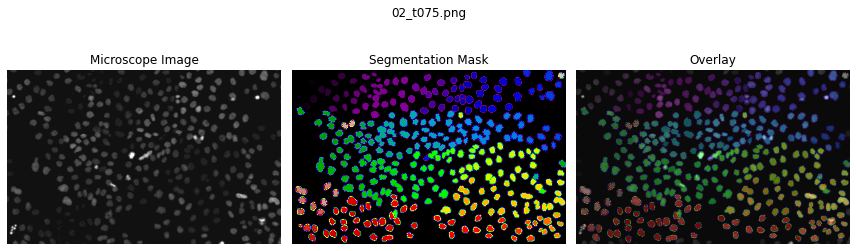

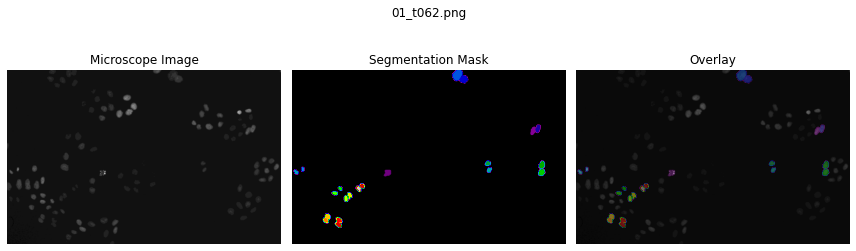

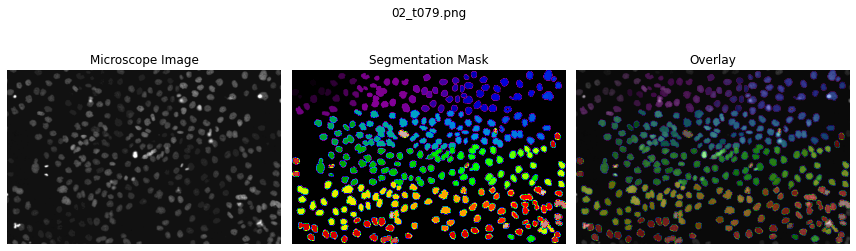

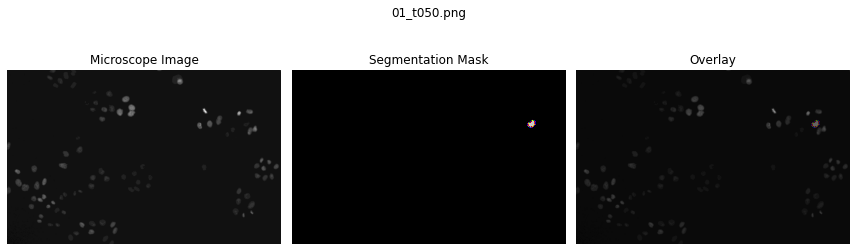

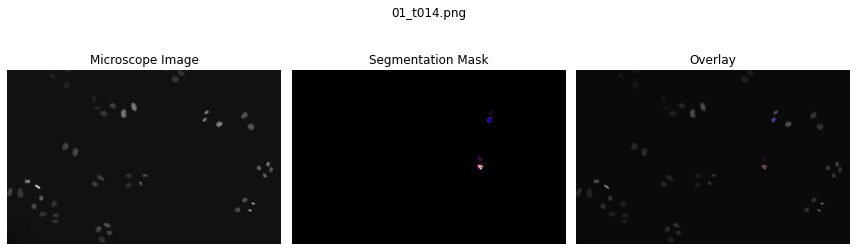

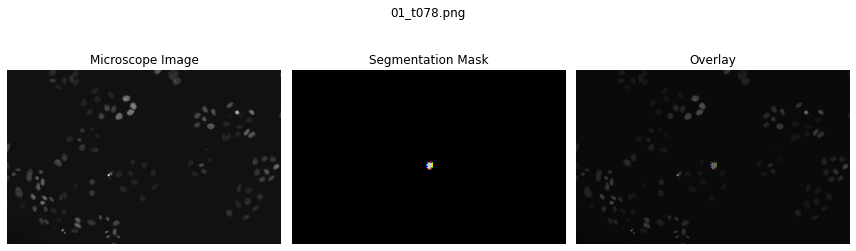

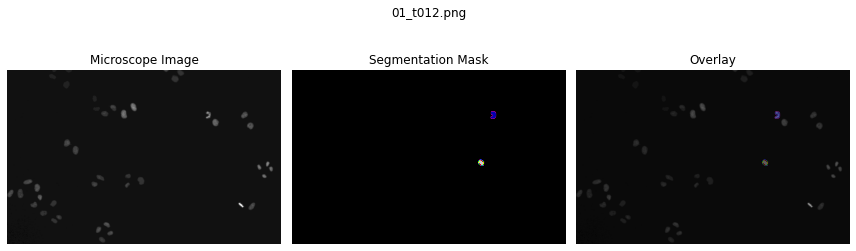

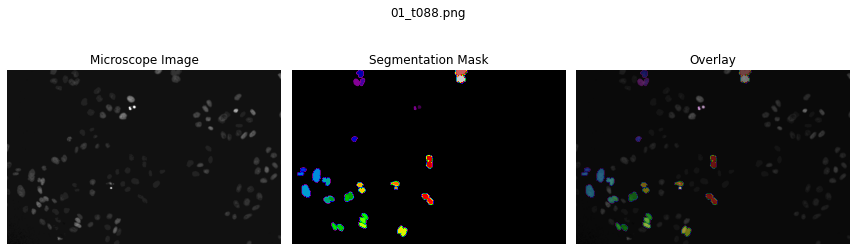

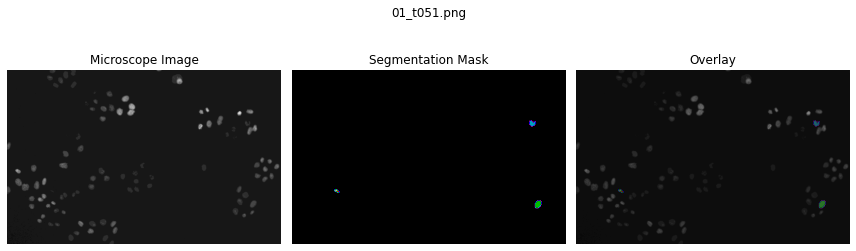

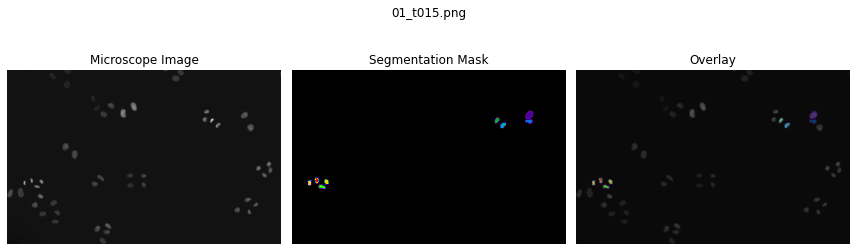

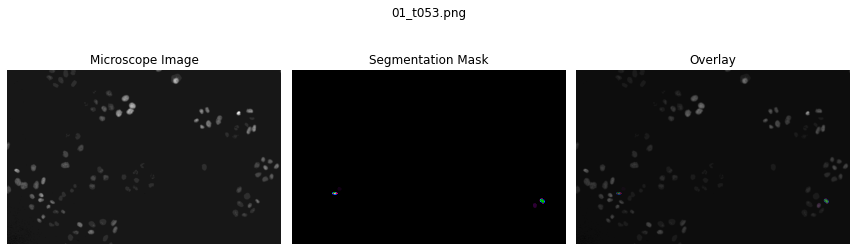

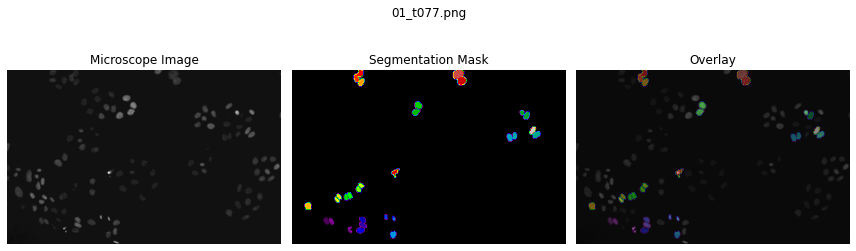

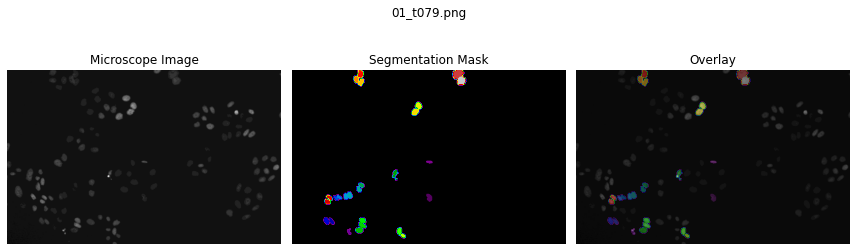

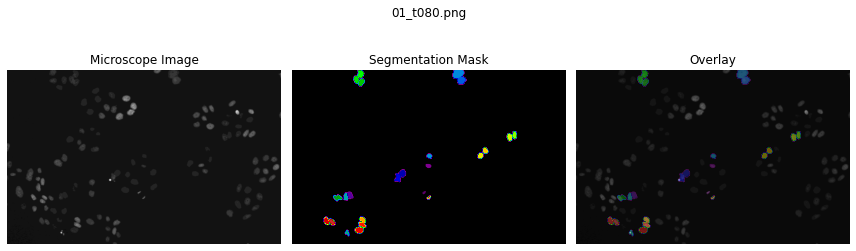

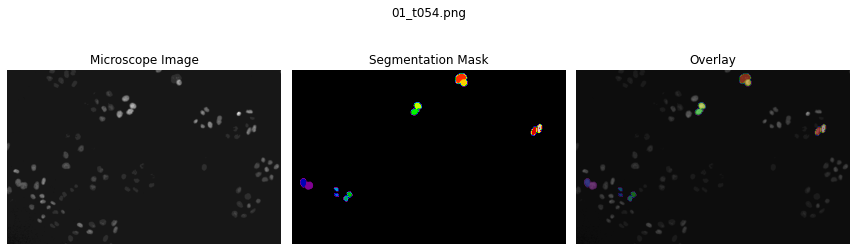

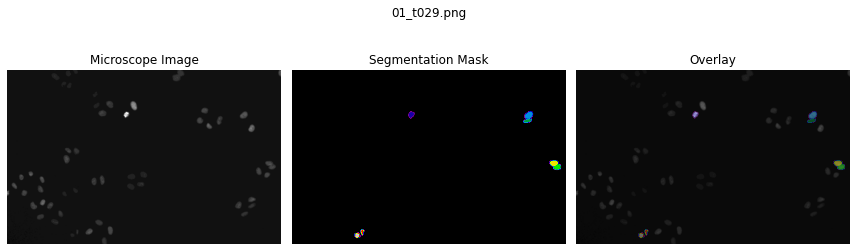

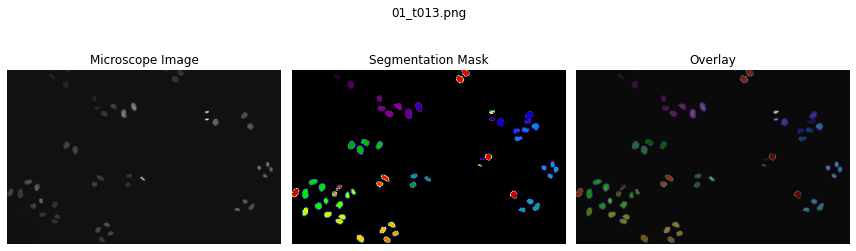

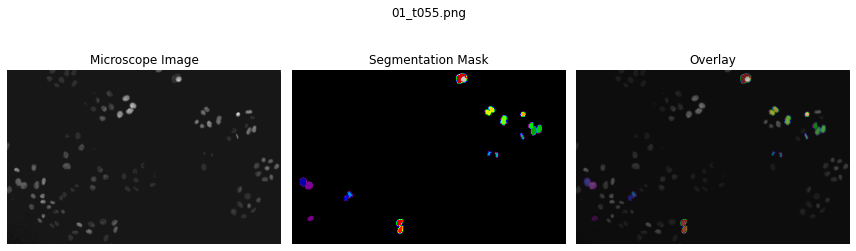

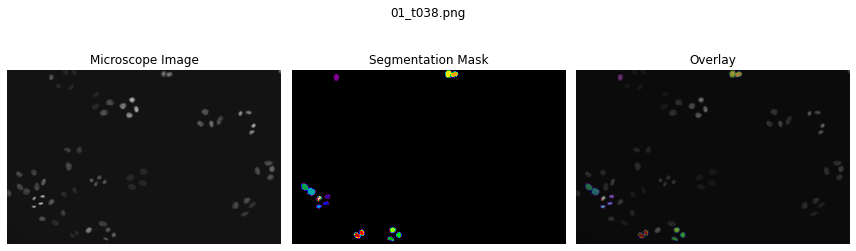

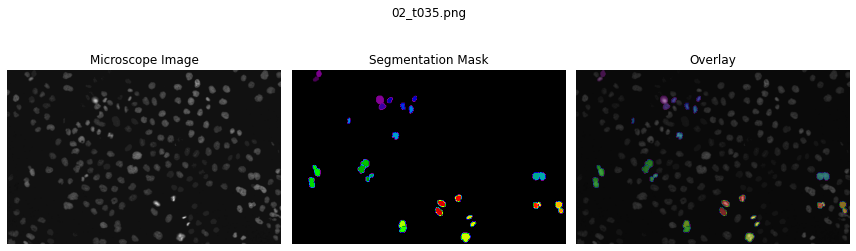

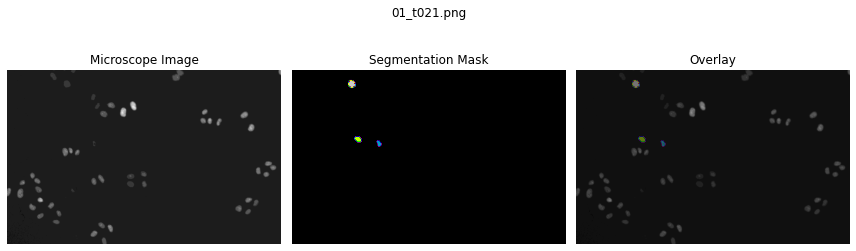

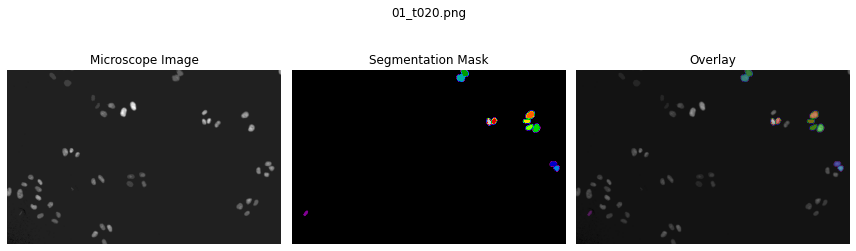

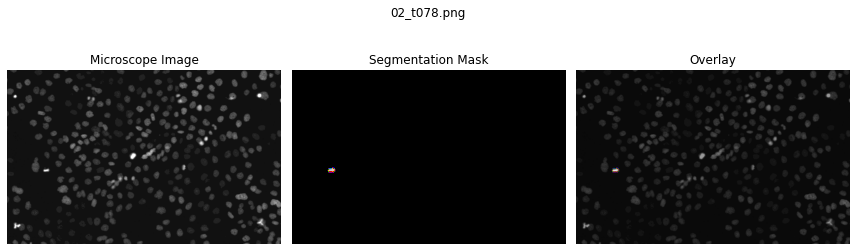

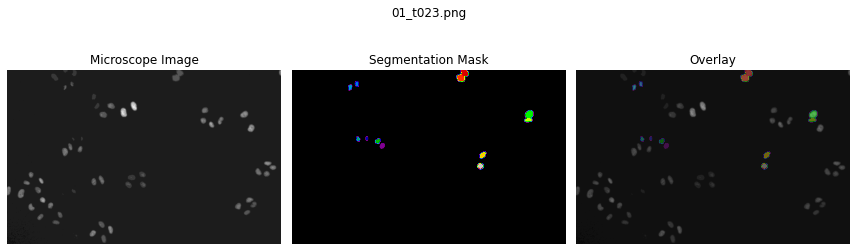

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# === Configuration ===
base_path = "../data/processed/Fluo-Structured"
img_path = os.path.join(base_path, "images", "train")
mask_path = os.path.join(base_path, "masks", "train")

# === Get random image filenames (only .png images) ===
image_files = [f for f in os.listdir(img_path)]
samples = random.sample(image_files, 25)

# === Plot each sample ===
for filename in samples:

    image_fp = os.path.join(img_path, filename)

    # Load image
    image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ Failed to load image: {image_fp}")
        continue

    # Try to locate matching mask (by filename, any extension)
    base_name = os.path.splitext(filename)[0]
    mask_candidates = glob(os.path.join(mask_path, base_name + ".*"))

    if not mask_candidates:
        print(f"❌ Mask not found for: {base_name}")
        continue

    mask_fp = mask_candidates[0]

    mask = cv2.imread(mask_fp, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"❌ Failed to load mask: {mask_fp}")
        continue

#     # === Plotting ===
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Microscope Image")
    plt.axis("off")

    # Segmentation Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='nipy_spectral')
    plt.title("Segmentation Mask")
    plt.axis("off")

#     # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='nipy_spectral', alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(filename)
    plt.tight_layout()
    plt.show()


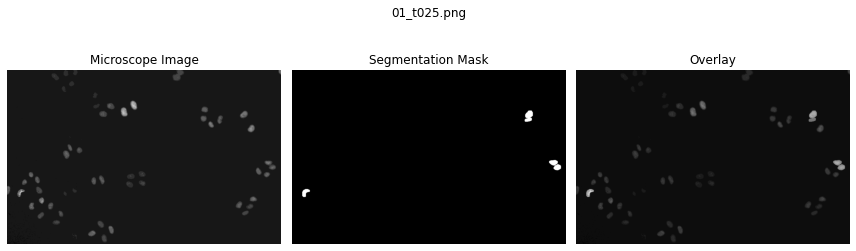

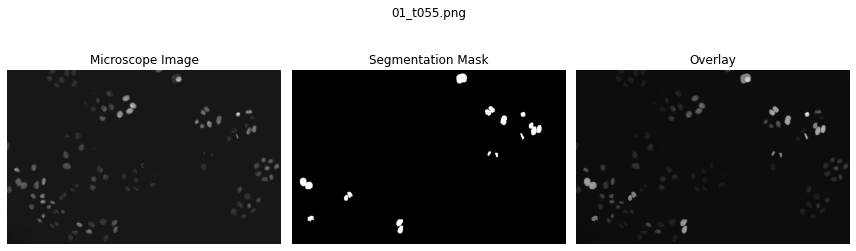

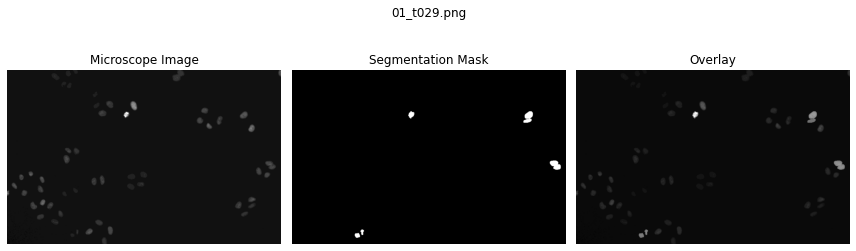

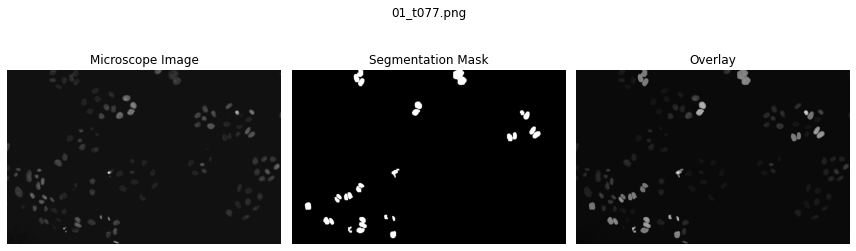

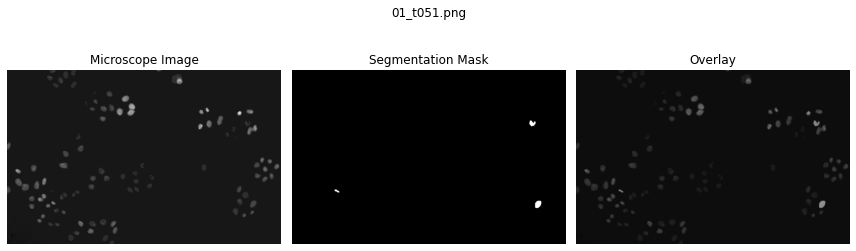

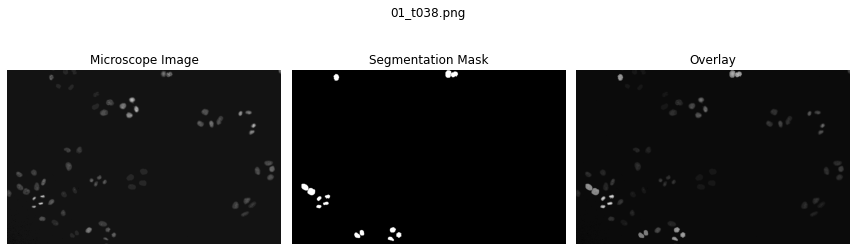

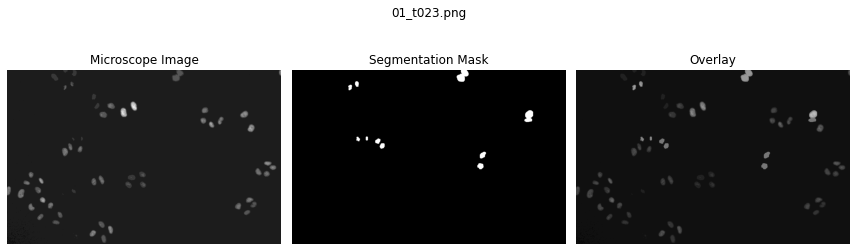

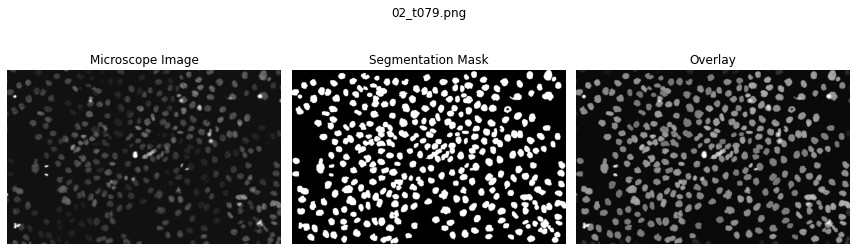

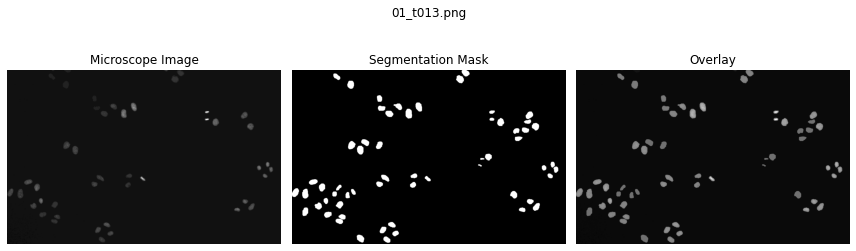

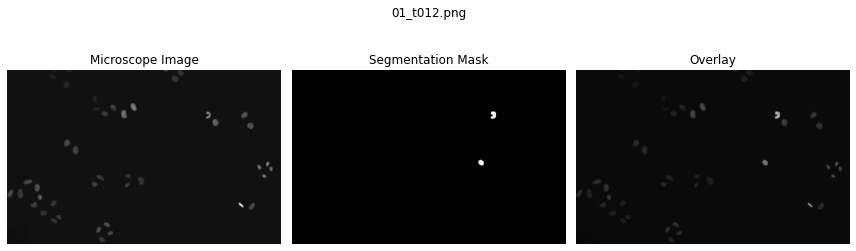

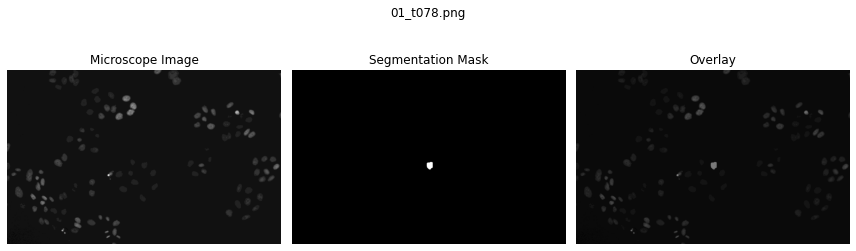

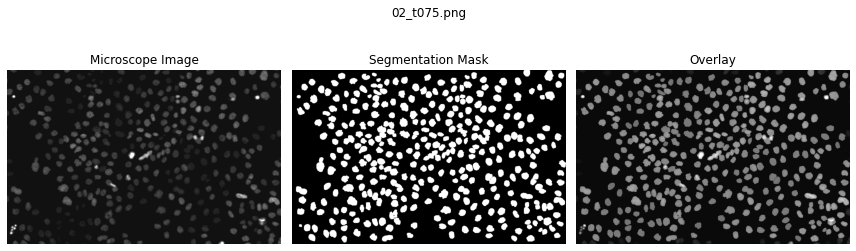

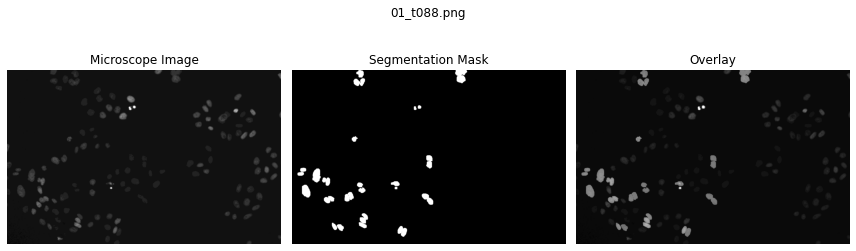

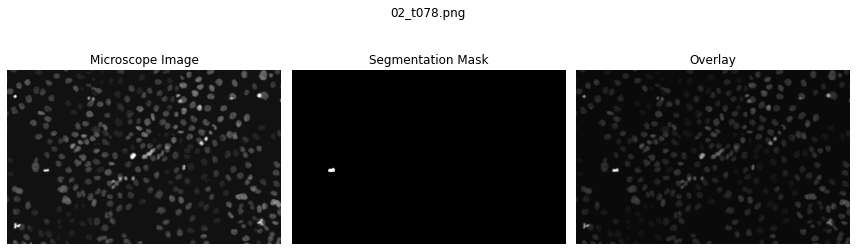

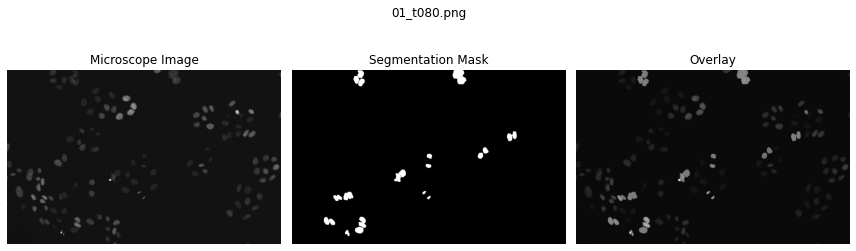

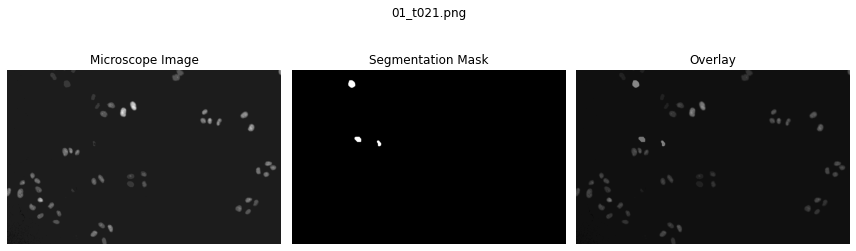

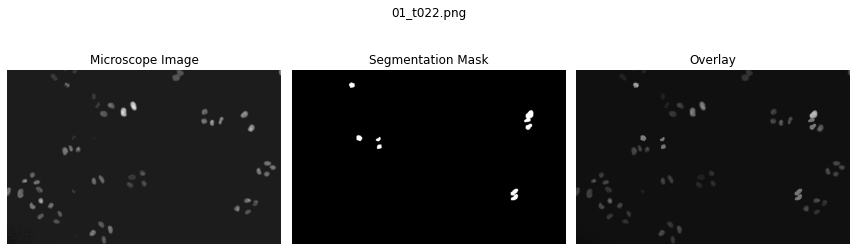

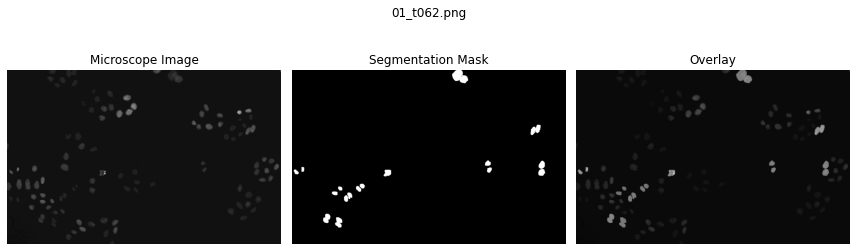

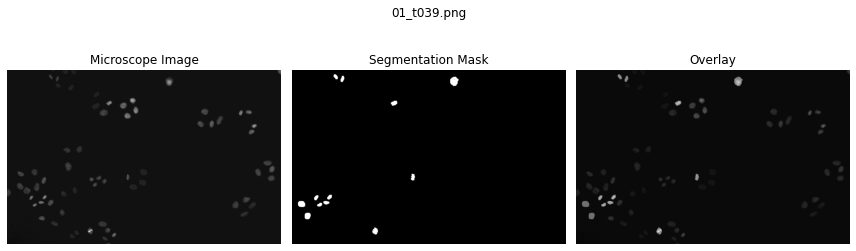

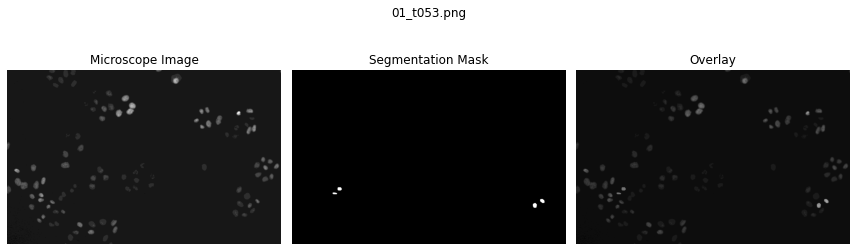

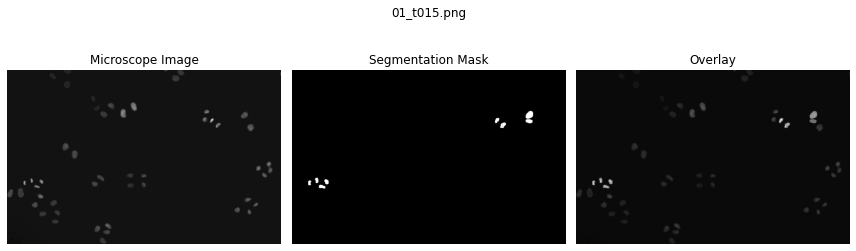

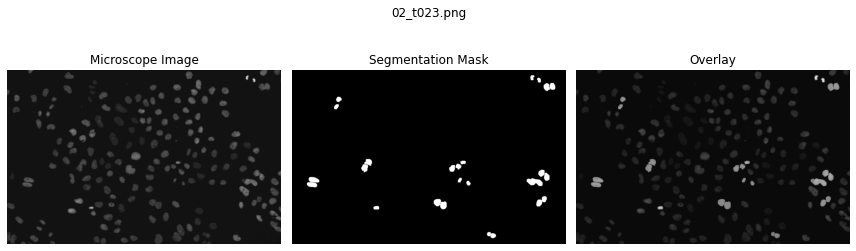

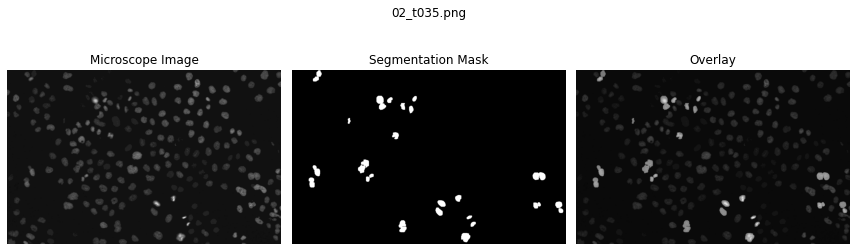

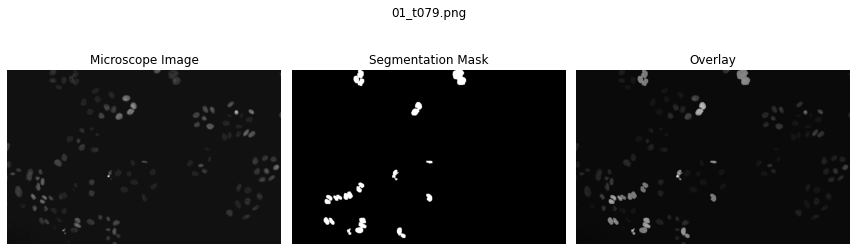

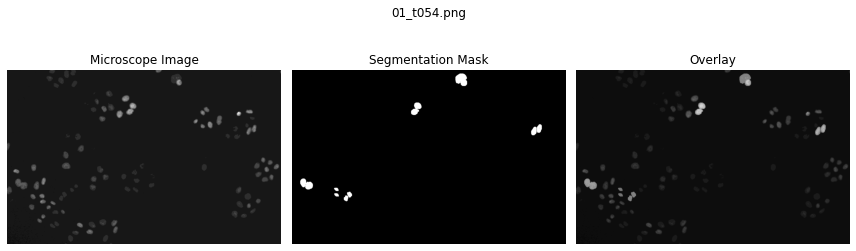

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# === Configuration ===
base_path = "../data/processed/Fluo-Structured"
img_path = os.path.join(base_path, "images", "train")
mask_path = os.path.join(base_path, "masks", "train")

# === Get random image filenames (only .png images) ===
image_files = [f for f in os.listdir(img_path)]
samples = random.sample(image_files, 25)

# === Plot each sample ===
for filename in samples:

    image_fp = os.path.join(img_path, filename)

    # Load image
    image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ Failed to load image: {image_fp}")
        continue

    # Try to locate matching mask (by filename, any extension)
    base_name = os.path.splitext(filename)[0]
    mask_candidates = glob(os.path.join(mask_path, base_name + ".*"))

    if not mask_candidates:
        print(f"❌ Mask not found for: {base_name}")
        continue

    mask_fp = mask_candidates[0]

    mask = cv2.imread(mask_fp, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"❌ Failed to load mask: {mask_fp}")
        continue

#     # === Plotting ===
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Microscope Image")
    plt.axis("off")

    # Segmentation Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Segmentation Mask")
    plt.axis("off")

#     # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='gray', alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(filename)
    plt.tight_layout()
    plt.show()


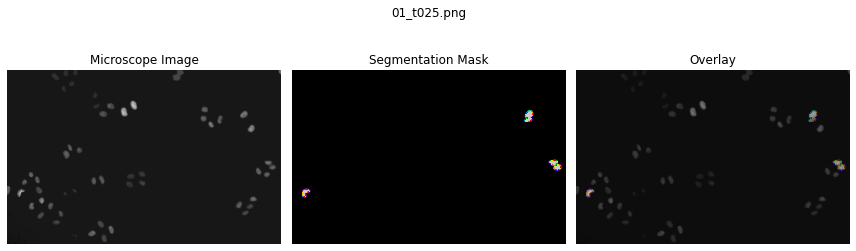

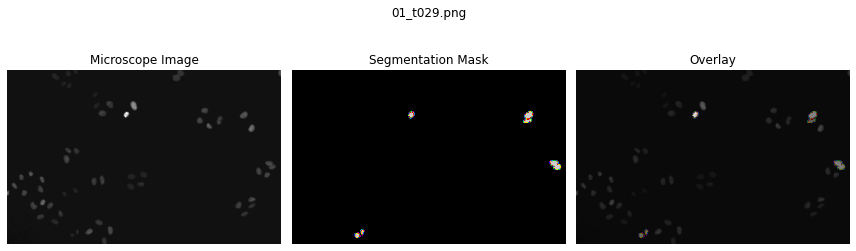

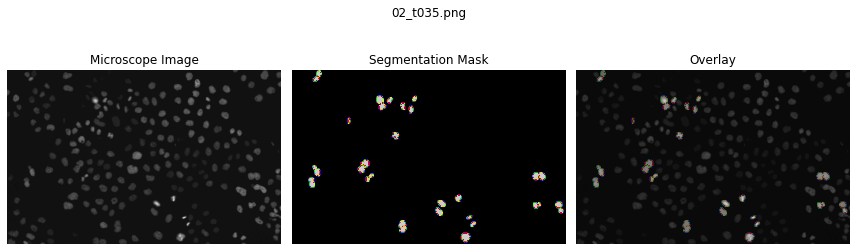

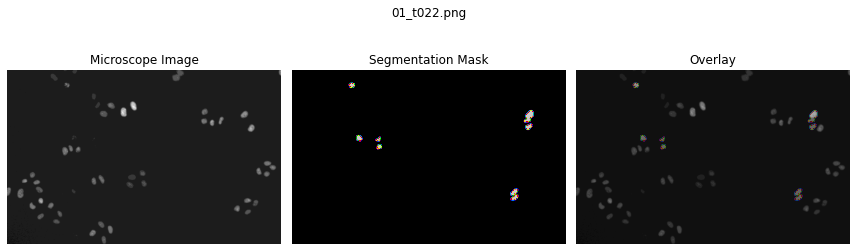

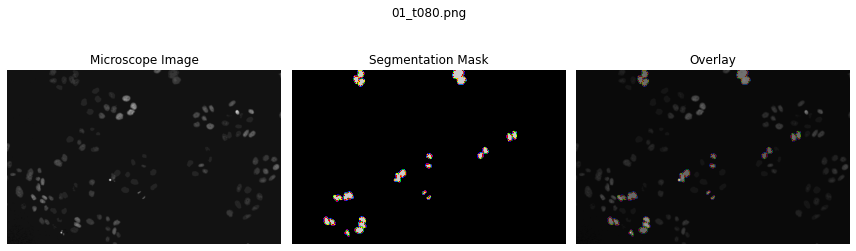

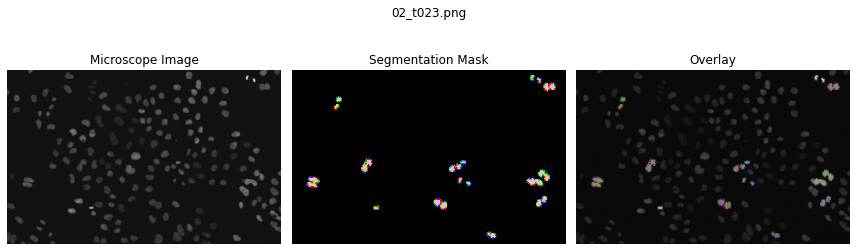

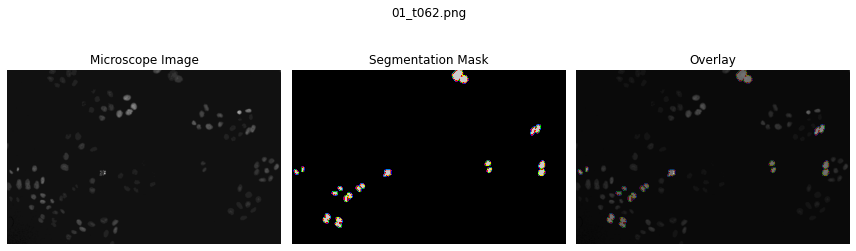

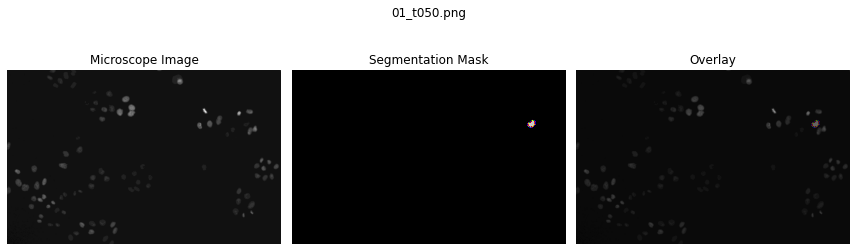

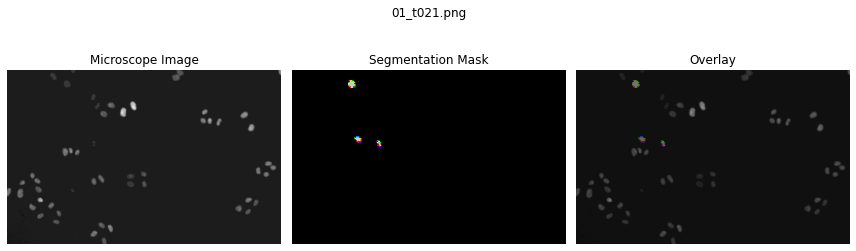

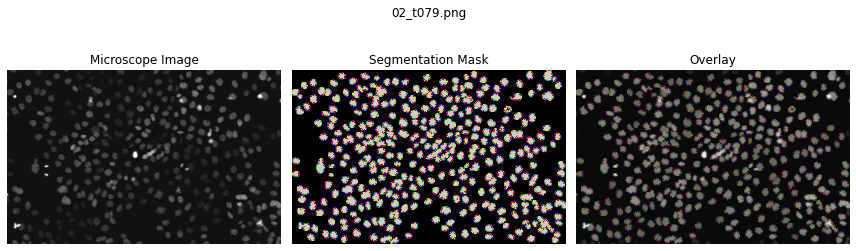

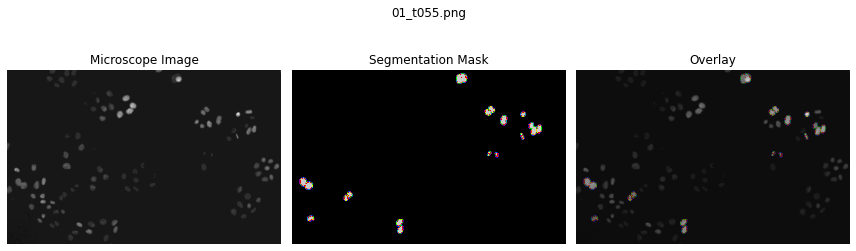

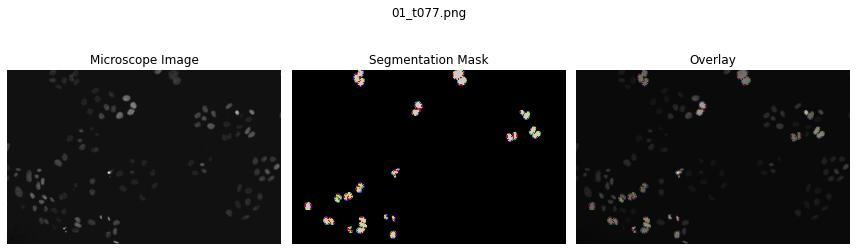

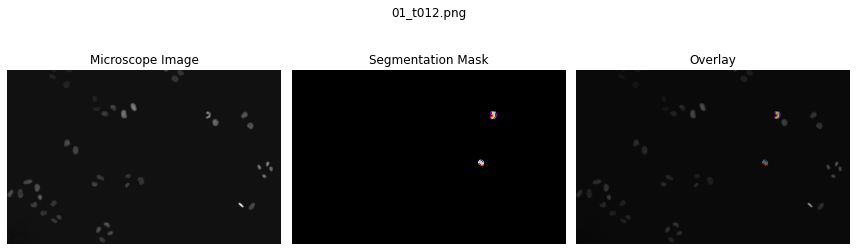

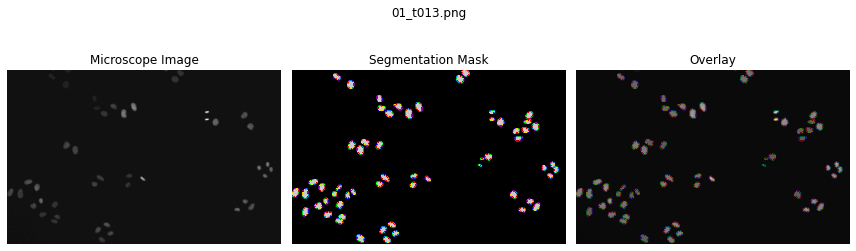

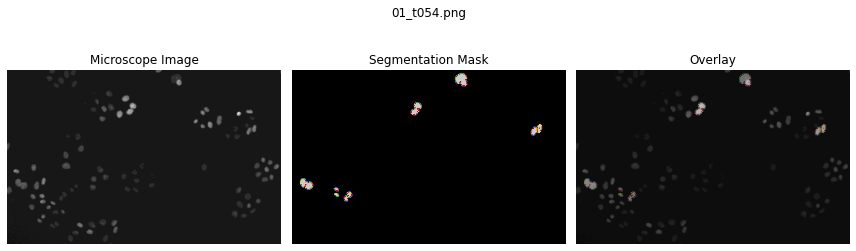

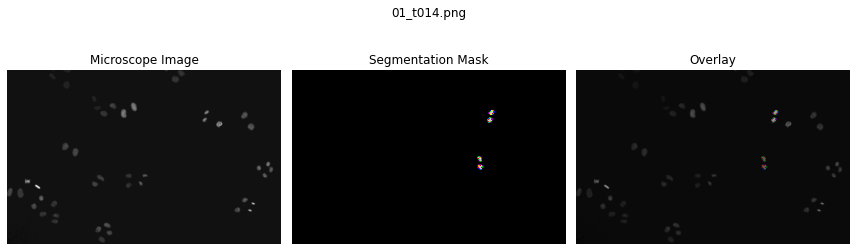

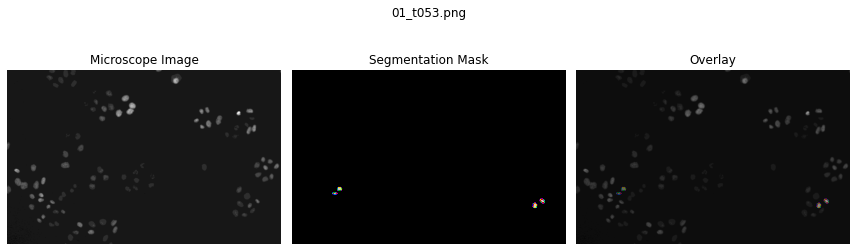

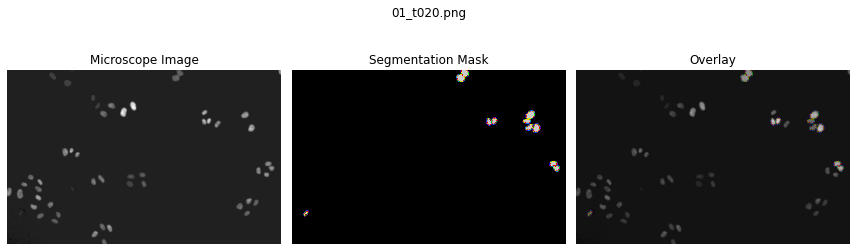

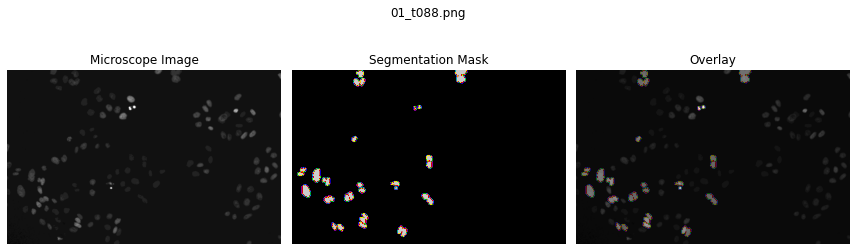

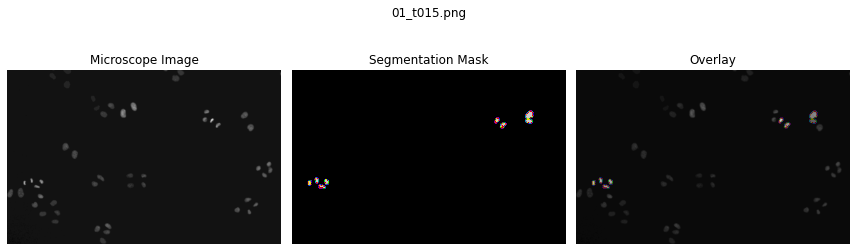

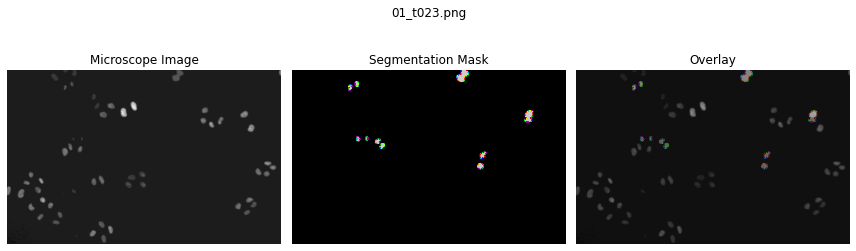

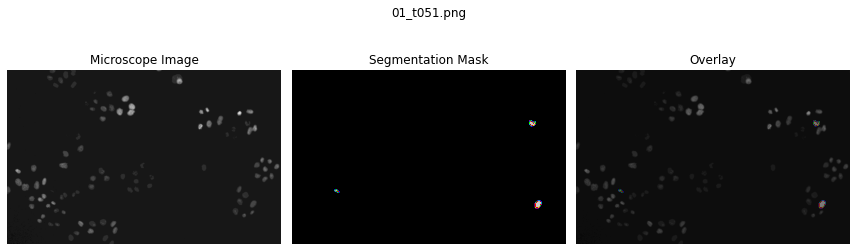

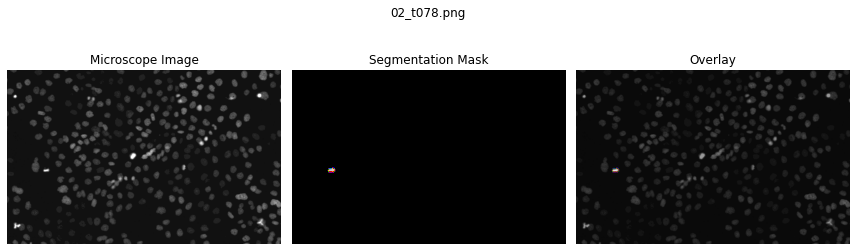

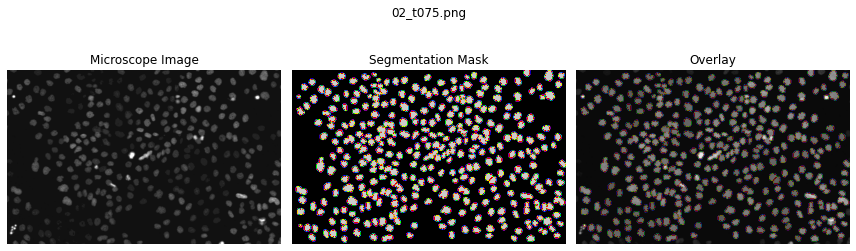

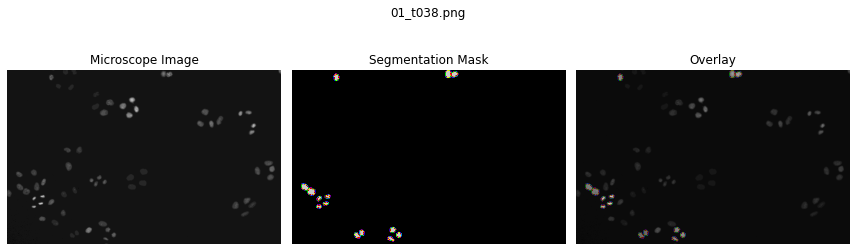

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# === Configuration ===
base_path = "../data/processed/Fluo-Structured"
img_path = os.path.join(base_path, "images", "train")
mask_path = os.path.join(base_path, "masks", "train")

# === Get random image filenames (only .png images) ===
image_files = [f for f in os.listdir(img_path)]
samples = random.sample(image_files, 25)

# === Plot each sample ===
for filename in samples:

    image_fp = os.path.join(img_path, filename)

    # Load image
    image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ Failed to load image: {image_fp}")
        continue

    # Try to locate matching mask (by filename, any extension)
    base_name = os.path.splitext(filename)[0]
    mask_candidates = glob(os.path.join(mask_path, base_name + ".*"))

    if not mask_candidates:
        print(f"❌ Mask not found for: {base_name}")
        continue

    mask_fp = mask_candidates[0]

    mask = cv2.imread(mask_fp, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"❌ Failed to load mask: {mask_fp}")
        continue

#     # === Plotting ===
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Microscope Image")
    plt.axis("off")

    # Segmentation Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='nipy_spectral')
    plt.title("Segmentation Mask")
    plt.axis("off")

#     # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='nipy_spectral', alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(filename)
    plt.tight_layout()
    plt.show()


# Preprocessing meth2 

In [ ]:
import shutil
from tqdm import tqdm 
data_folder = "../data/processed/Fluo-Structured-2"
os.makedirs(data_folder, exist_ok=True)

dict_subsets = {
    "train": train_pairs,
    "val": val_pairs
}

# def save_image(src_path,destination):
    
#     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
# #     with Image.open(src_path) as img:
        
#     if "man_seg" in src_path:
#         base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
#         rec = src_path.split("\\")[0].split("/")[1].split("_")[0]
#         dst_path = os.path.join(destination, f"{rec}_t" + base_name + ".png")

# #             print(os.path.splitext(os.path.basename(src_path))[0].split("man_seg"))
#     else:
#         base_name = os.path.splitext(os.path.basename(src_path))[0]
#         rec = src_path.split("\\")[0].split("/")[1]

#         dst_path = os.path.join(destination, f"{rec}_" + base_name + ".png")

# #         img.save(dst_path, format="PNG")
#     cv2.imwrite(dst_path, img.astype(np.uint8))

# def save_image(src_path, destination):
#     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)

#     if img is None:
#         print(f"Failed to read image: {src_path}")
#         return

#     if "man_seg" in src_path:
#         base_name = os.path.splitext(os.path.basename(src_path))[0].split("man_seg")[-1]
# #         rec = os.path.basename(os.path.dirname(src_path)).split("_")[0]
#         rec = src_path.split("\\")[0].split("/")[1].split("_")[0]

#         dst_path = os.path.join(destination, f"{rec}_t{base_name}.png")
#     else:
#         base_name = os.path.splitext(os.path.basename(src_path))[0]
#         rec = os.path.basename(os.path.dirname(src_path))

#         dst_path = os.path.join(destination, f"{rec}_{base_name}.png")

#     cv2.imwrite(dst_path, img.astype(np.uint8))

    
for images_folder in ["images","masks"]:
    os.makedirs( os.path.join(data_folder,images_folder), exist_ok=True )
    
    for subset in ["train", "val"]:
        os.makedirs( os.path.join(data_folder, images_folder, subset), exist_ok=True)
        
        for image, mask in tqdm(dict_subsets[subset],desc= f"{images_folder},{subset}" ):
           
            rec_mask = mask.split("/")[1].split("_")[0] + "_"
            rec_image = image.split("/")[1].split("\\")[0]+ "_"
            
            
            image_base = rec_image + image.split("\\")[-1]
            mask_base = rec_mask+  mask.split("\\")[-1].replace("man_seg","t")

#             print(mask_base)
#             print(image)
            destination = os.path.join(data_folder, images_folder, subset)
            
            
            
            #copy
            if images_folder == "images":
#                 save_image(image,destination)
                shutil.copy2(image,  os.path.join(destination, image_base))
            else:
#                 save_image(mask,destination)
                shutil.copy2(mask,  os.path.join(destination, mask_base))            
            
            
#             print(image.split("\\"))
#             print(mask.split("\\"))
            
#dna-> rna -> protein

masks,val: 100%|█████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 50.00it/s]


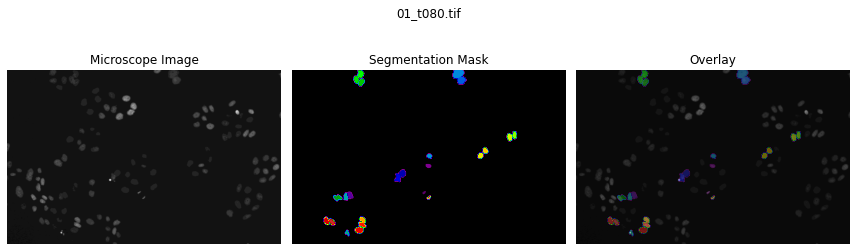

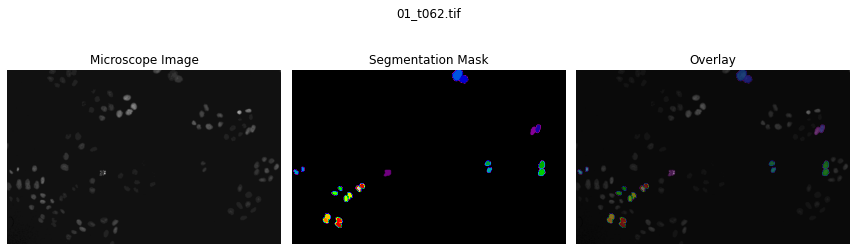

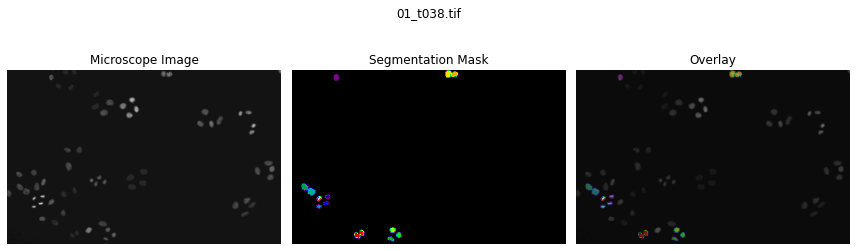

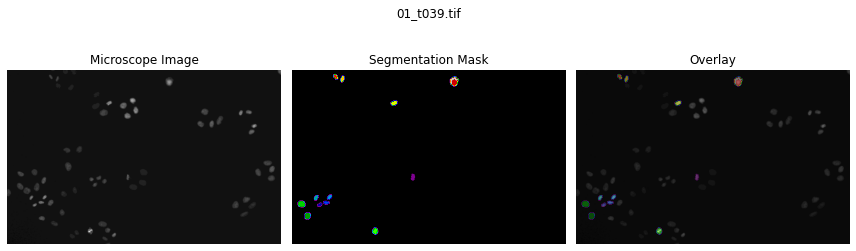

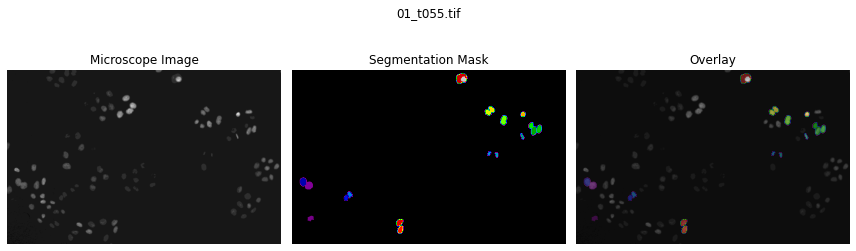

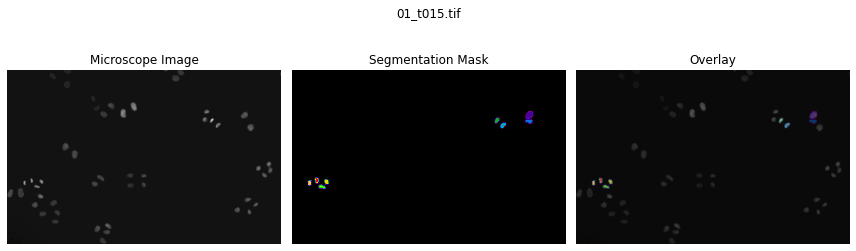

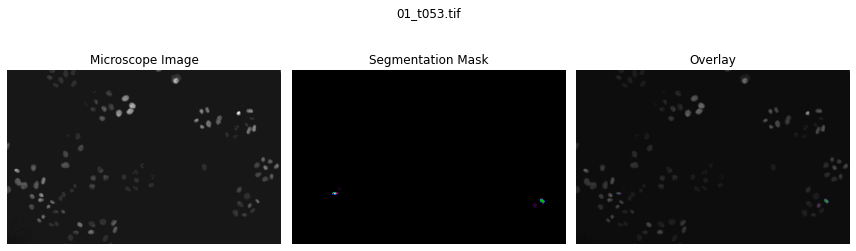

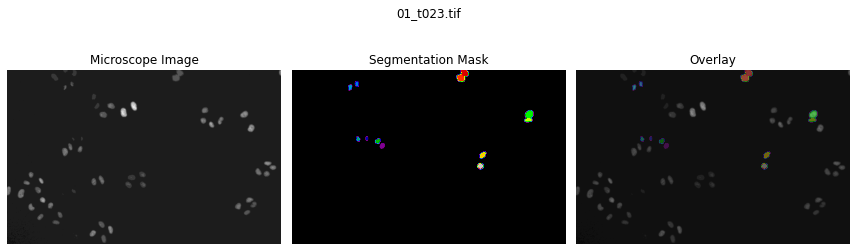

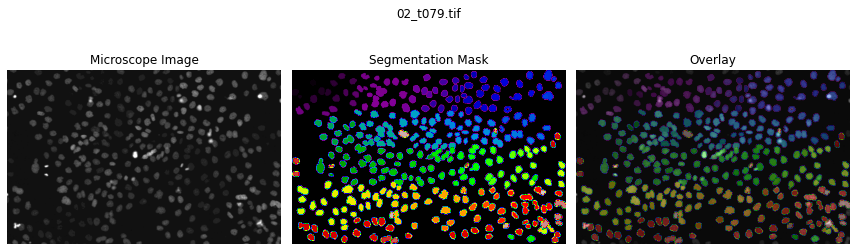

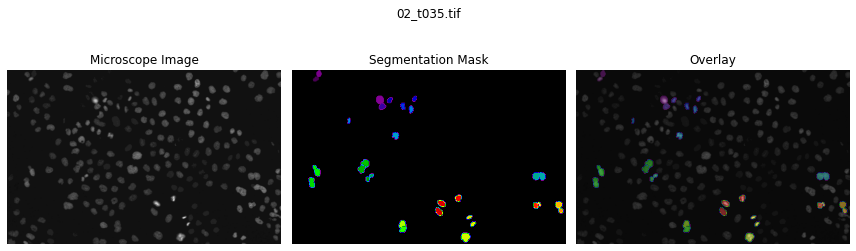

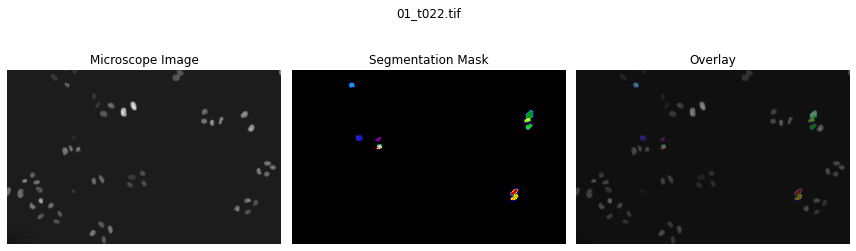

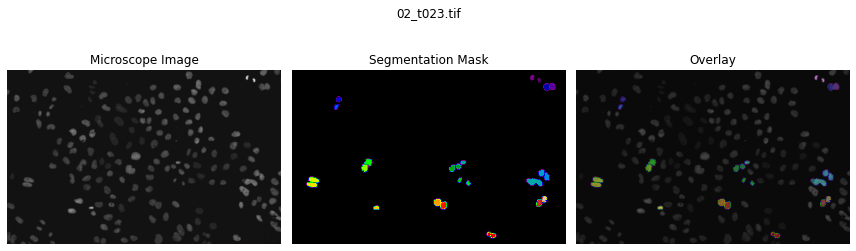

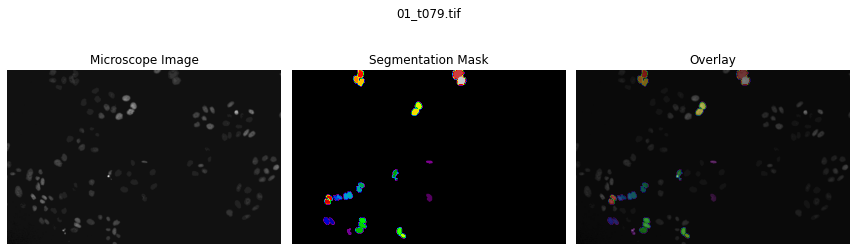

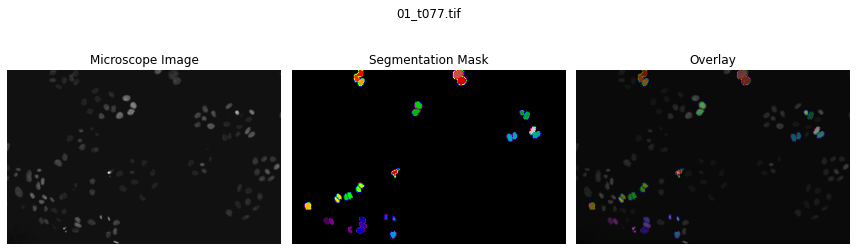

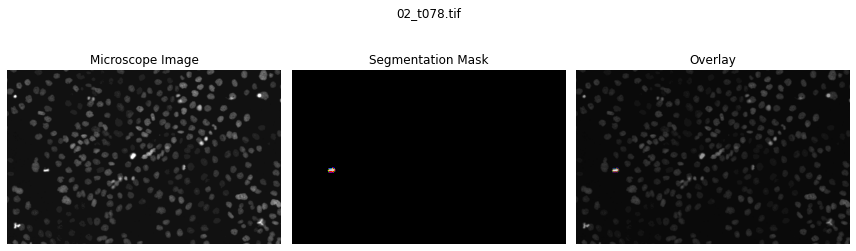

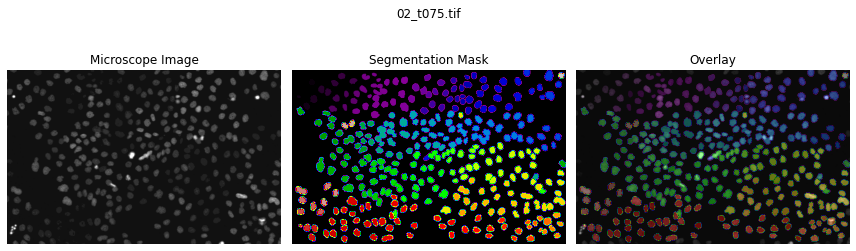

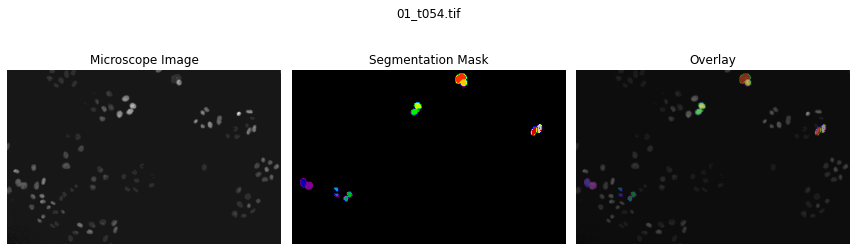

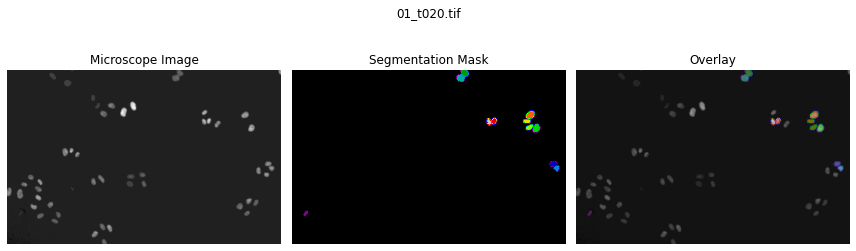

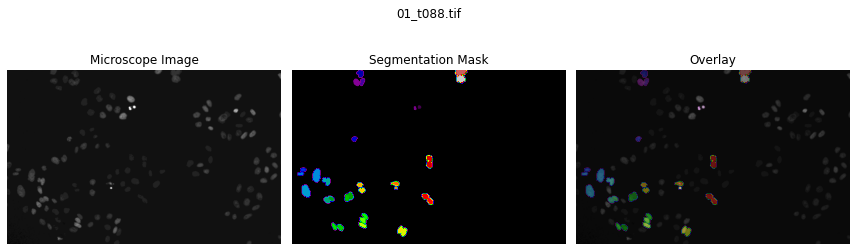

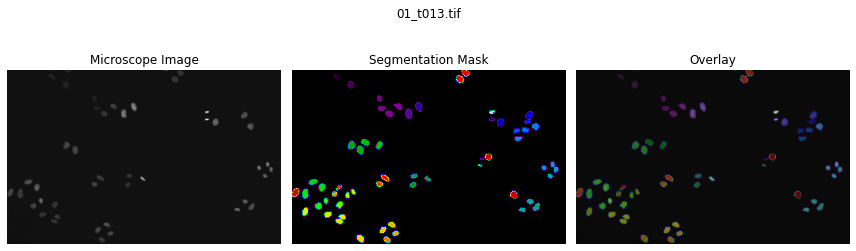

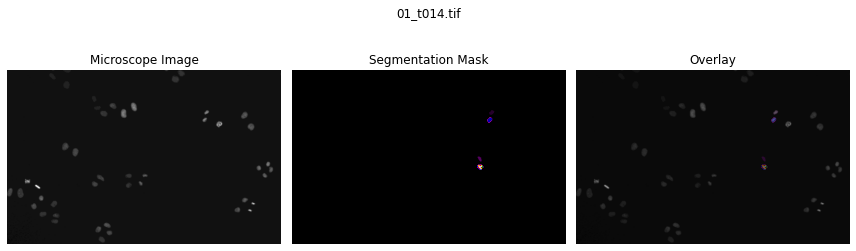

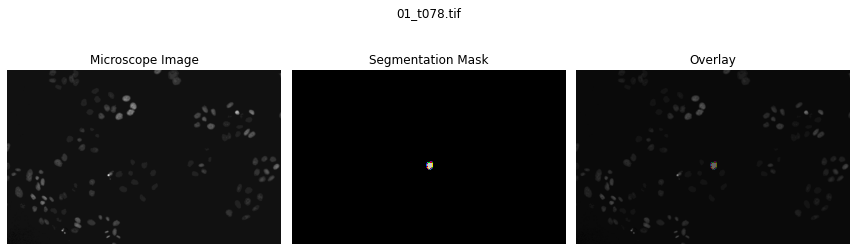

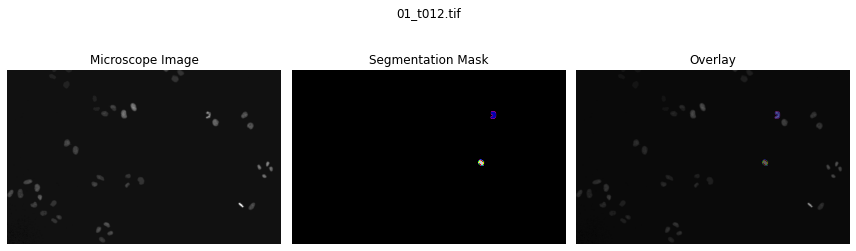

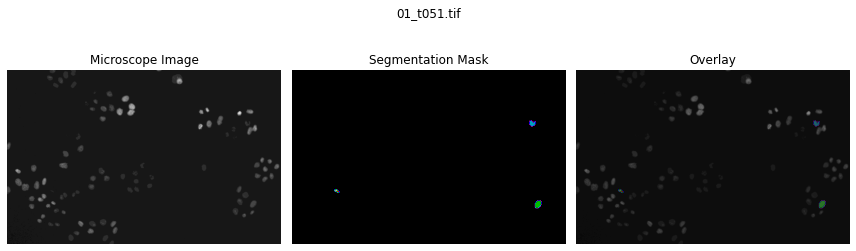

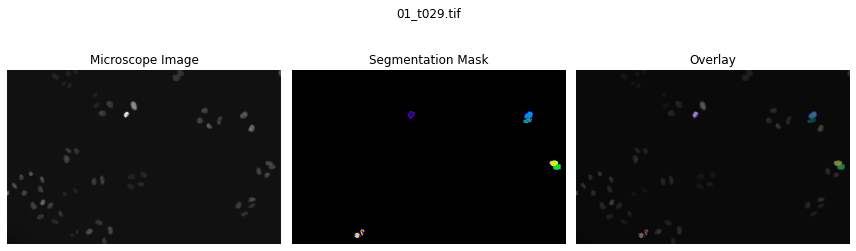

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# === Configuration ===
base_path = "../data/processed/Fluo-Structured-2"
img_path = os.path.join(base_path, "images", "train")
mask_path = os.path.join(base_path, "masks", "train")

# === Get random image filenames (only .png images) ===
image_files = [f for f in os.listdir(img_path)]
samples = random.sample(image_files, 25)
# samples = random.sample(image_files, 8)

# === Plot each sample ===
for filename in samples:

    image_fp = os.path.join(img_path, filename)

    # Load image
    image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ Failed to load image: {image_fp}")
        continue

    # Try to locate matching mask (by filename, any extension)
    base_name = os.path.splitext(filename)[0]
    mask_candidates = glob(os.path.join(mask_path, base_name + ".*"))

    if not mask_candidates:
        print(f"❌ Mask not found for: {base_name}")
        continue

    mask_fp = mask_candidates[0]

    mask = cv2.imread(mask_fp, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"❌ Failed to load mask: {mask_fp}")
        continue

#     # === Plotting ===
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Microscope Image")
    plt.axis("off")

    # Segmentation Mask
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='nipy_spectral')
    plt.title("Segmentation Mask")
    plt.axis("off")

#     # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='nipy_spectral', alpha=0.4)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(filename)
    plt.tight_layout()
    plt.show()
